# What are the factors that best predict the rate of homelessness in U.S. cities? 
Subquestion: What is the projected rate of homelessness in Hawaii for 2023?

The [HUD](https://www.huduser.gov/portal/pdrdatas_landing.html) website provides a variety of datasets regarding housing and homelessness that may prove useful.

# Description of Current Data:
- hic_df_total: 2007 - 2021 Housing Inventory Count (HIC) by State, 56 rows (one for each state, totalled stats)
- 

In [500]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### EDA hic_df_total

In [501]:
hic_df_total = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/2007-2021-HIC-Counts-by-State.xlsx', header=1)

In [502]:
hic_df_total.head()

State  Total Year-Round Beds (ES, TH, SH)  \
0    AK                                2270   
1    AL                                2394   
2    AR                                2615   
3    AZ                                6411   
4    CA                               60582   

   Total Non-DV Year-Round Beds (ES, TH, SH)  \
0                                       1703   
1                                       1892   
2                                       1996   
3                                       5718   
4                                      56569   

   Total HMIS Year-Round Beds (ES, TH, SH)  \
0                                     1603   
1                                     1365   
2                                     1399   
3                                     5047   
4                                    44594   

   HMIS Participation Rate for Year-Round Beds (ES, TH, SH)  \
0                                             0.7062          
1                                             0.5702          
2                                             0.5350          
3                                             0.7872          
4                                             0.7361          

   Total Year-Round Beds (ES)  Total Year-Round Beds (TH)  \
0                        1769                         501   
1                        1682                         678   
2                        2238                         377   
3                        4292                        2026   
4                       45229                       14800   

   Total Year-Round Beds (SH)  \
0                           0   
1                          34   
2                           0   
3                          93   
4                         553   

   Total Units for Households with Children (ES, TH, SH)  \
0                                                204       
1                                                300       
2                                                270       
3                                                818       
4                                               7671       

   Total Beds for Households with Children (ES, TH, SH)  ...  \
0                                                603     ...   
1                                                831     ...   
2                                                922     ...   
3                                               2752     ...   
4                                              23745     ...   

   Total Year-Round Beds (OPH)  Total Non-DV Year-Round Beds (OPH)  \
0                           88                                  88   
1                           42                                  42   
2                            0                                   0   
3                          354                                 354   
4                        11044                               10891   

   Total HMIS Year-Round Beds (OPH)  \
0                                88   
1                                42   
2                                 0   
3                               354   
4                              6092   

   HMIS Participation Rate for Year-Round Beds (OPH)  \
0                                                  1   
1                                                  1   
2                                                  .   
3                                                  1   
4                                             0.5516   

   Total Units for Households with Children (OPH)  \
0                                               3   
1                                               0   
2                                               0   
3                                              73   
4                                            1100   

   Total Beds for Households with Children (OPH)  \
0                                              8   
1                                             

In [503]:
hic_df_total.shape

(56, 77)

In [504]:
hic_df_total.columns

Index(['State', 'Total Year-Round Beds (ES, TH, SH)',
       'Total Non-DV Year-Round Beds (ES, TH, SH)',
       'Total HMIS Year-Round Beds (ES, TH, SH)',
       'HMIS Participation Rate for Year-Round Beds (ES, TH, SH)',
       'Total Year-Round Beds (ES)', 'Total Year-Round Beds (TH)',
       'Total Year-Round Beds (SH)',
       'Total Units for Households with Children (ES, TH, SH)',
       'Total Beds for Households with Children (ES, TH, SH)',
       'Total Beds for Households without Children (ES, TH, SH)',
       'Total Beds for Households with only Children (ES, TH, SH)',
       'Dedicated Veteran Beds (ES, TH, SH)',
       'Dedicated Youth Beds (ES, TH, SH)', 'Total Year-Round Beds (ES).1',
       'Total Non-DV Year-Round Beds (ES)', 'Total HMIS Year-Round Beds (ES)',
       'HMIS Participation Rate for Year-Round Beds (ES)',
       'Total Seasonal Beds (ES)', 'Total Overflow Beds (ES)',
       'Total Units for Households with Children (ES)',
       'Total Beds for Households

# EDA Homelessness Prediction Data

## Learning about the features of our dataset:

This data is from [this article](https://www.huduser.gov/portal/publications/Market-Predictors-of-Homelessness.html) titled Market Predictors of Homelessness: How Housing and Community Factors Shape Homelessness Rates Within Continuums of Care. The article found that housing factors are most consistently associated with higher rates of community-level homelessness (at the Continuum of Care (CoC) level). 

In [505]:
raw_df = pd.read_csv('https://www.huduser.gov/portal/sites/default/files/xls/05b_analysis_file_update.csv')

data_dict = pd.read_excel('https://www.huduser.gov/portal/sites/default/files/xls/HUD%20TO3%20-%2005b%20Analysis%20File%20-%20Data%20Dictionary.xlsx')


Inspecting the data dictionary is very informative. Let's take a look first at what variables can be considered "Outcomes". 

In [506]:
from tabulate import tabulate

In [507]:
temp = data_dict[[i in  ['Outcome', 'Secondary Outcome'] for i in data_dict['Associated Domain']]]
outcome_features = temp['Variable'].values

print(tabulate(temp[['Variable', 'Variable Label', 'Associated Domain']], headers='keys', tablefmt='psql'))


+-----+----------------------------------+--------------------------------------------------------------------+---------------------+
|     | Variable                         | Variable Label                                                     | Associated Domain   |
|-----+----------------------------------+--------------------------------------------------------------------+---------------------|
|   2 | pit_tot_shelt_pit_hud            | total sheltered - HUD PIT                                          | Outcome             |
|   3 | pit_tot_unshelt_pit_hud          | total unsheltered - HUD PIT                                        | Outcome             |
|   4 | pit_tot_hless_pit_hud            | total homeless - HUD PIT                                           | Outcome             |
|   5 | pit_ind_shelt_pit_hud            | individuals sheltered - HUD PIT                                    | Secondary Outcome   |
|   6 | pit_ind_unshelt_pit_hud          | individuals unshelt

In [508]:
temp.to_csv('outcomes.csv')

In [509]:
# this is here if I ever want to inspect the meaning of a specific feature
def what_is_this_feature(feat_name):
    return data_dict[data_dict['Variable'] == feat_name]['Variable Label'].values[0]

what_is_this_feature('pit_tot_hless_pit_hud')

'total homeless - HUD PIT'

In [510]:
raw_df.head()

year cocnumber  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
0  2010    AK-500                 1113.0                    118.0   
1  2011    AK-500                 1082.0                    141.0   
2  2012    AK-500                 1097.0                     50.0   
3  2013    AK-500                 1070.0                     52.0   
4  2014    AK-500                  970.0                     53.0   

   pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
0                 1231.0                  633.0                    107.0   
1                 1223.0                  677.0                    117.0   
2                 1147.0                  756.0                     35.0   
3                 1122.0                  792.0                     52.0   
4                 1023.0                  688.0                     48.0   

   pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
0                  740.0                     480.0   
1                  794.0                     405.0   
2                  791.0                     341.0   
3                  844.0                     278.0   
4                  736.0                     282.0   

   pit_perfam_unshelt_pit_hud  ...  sub_high_cost_rent75  \
0                        11.0  ...                     1   
1                        24.0  ...                     1   
2                        15.0  ...                     1   
3                         0.0  ...                     1   
4                         5.0  ...                     1   

   sub_high_cost_homeval75  sub_high_rent_share75  tight_high_cost_rental_mkt  \
0                        1                      1                           3   
1                        1                      0                           3   
2                        1                      1                           3   
3                        1                      0                           3   
4                        1                      1                           3   

   sub_tight_high_cost_rent  sub_west_coast_all_urb  sub_west_census  \
0                         1                       1                1   
1                         1                       1                1   
2                         1                       1                1   
3                         1                       1                1   
4                         1                       1                1   

   major_city  suburban  rural  
0           1         0      0  
1           1         0      0  
2           1         0      0  
3           1         0      0  
4           1         0      0  

[5 rows x 332 columns]

In [511]:
raw_df.describe()

year  pit_tot_shelt_pit_hud  pit_tot_unshelt_pit_hud  \
count  3008.000000            2994.000000              2994.000000   
mean   2013.500000            1033.852037               526.581830   
std       2.291669            3445.807044              1742.313472   
min    2010.000000               3.000000                 0.000000   
25%    2011.750000             224.000000                36.250000   
50%    2013.500000             445.500000               114.000000   
75%    2015.250000             961.500000               418.250000   
max    2017.000000           72565.000000             42828.000000   

       pit_tot_hless_pit_hud  pit_ind_shelt_pit_hud  pit_ind_unshelt_pit_hud  \
count            2994.000000            2994.000000              2994.000000   
mean             1560.433868             540.342351               442.891784   
std              4313.387045            1367.938173              1569.110148   
min                 7.000000               0.000000                 0.000000   
25%               320.250000             120.250000                31.000000   
50%               679.000000             253.000000                98.000000   
75%              1468.000000             560.000000               337.000000   
max             76501.000000           27188.000000             41241.000000   

       pit_ind_hless_pit_hud  pit_perfam_shelt_pit_hud  \
count            2994.000000               2994.000000   
mean              983.230795                493.509686   
std              2497.924191               2134.964146   
min                 2.000000                  0.000000   
25%               192.000000                 89.000000   
50%               428.000000                175.000000   
75%               930.000000                397.000000   
max             49265.000000              45711.000000   

       pit_perfam_unshelt_pit_hud  pit_perfam_hless_pit_hud  ...  \
count                 2994.000000               2994.000000  ...   
mean                    83.693387                577.203073  ...   
std                    338.834491               2179.472363  ...   
min                      0.000000                  0.000000  ...   
25%                      0.000000                107.000000  ...   
50%                      6.000000                217.000000  ...   
75%                     40.000000                493.000000  ...   
max                   6948.000000              45711.000000  ...   

       sub_high_cost_rent75  sub_high_cost_homeval75  sub_high_rent_share75  \
count           3008.000000              3008.000000            3008.000000   
mean               0.610372                 0.632314               0.600399   
std                0.487747                 0.482256               0.489898   
min                0.000000                 0.000000               0.000000   
25%                0.000000                 0.000000               0.000000   
50%                1.000000                 1.000000               1.000000   
75%                1.000000                 1.000000               1.000000   
max                1.000000                 1.000000               1.000000   

       tight_high_cost_rental_mkt  sub_tight_high_cost_rent  \
count                 3008.000000               3008.000000   
mean                     1.950133                  0.562500   
std                      1.341383                  0.496161   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      3.000000                  1.000000   
75%                      3.000000                  1.000000   
max                      4.000000                  1.000000   

       sub_west_coast_all_urb  sub_west_census   major_city     suburban  \
count             3008.000000      3008.000000  3008.000000  3008.000000   
mean                 0.140957         0.194149     0.276596     0.425532   
std               

## Handling missing data:
There is a lot of it.

<AxesSubplot: >

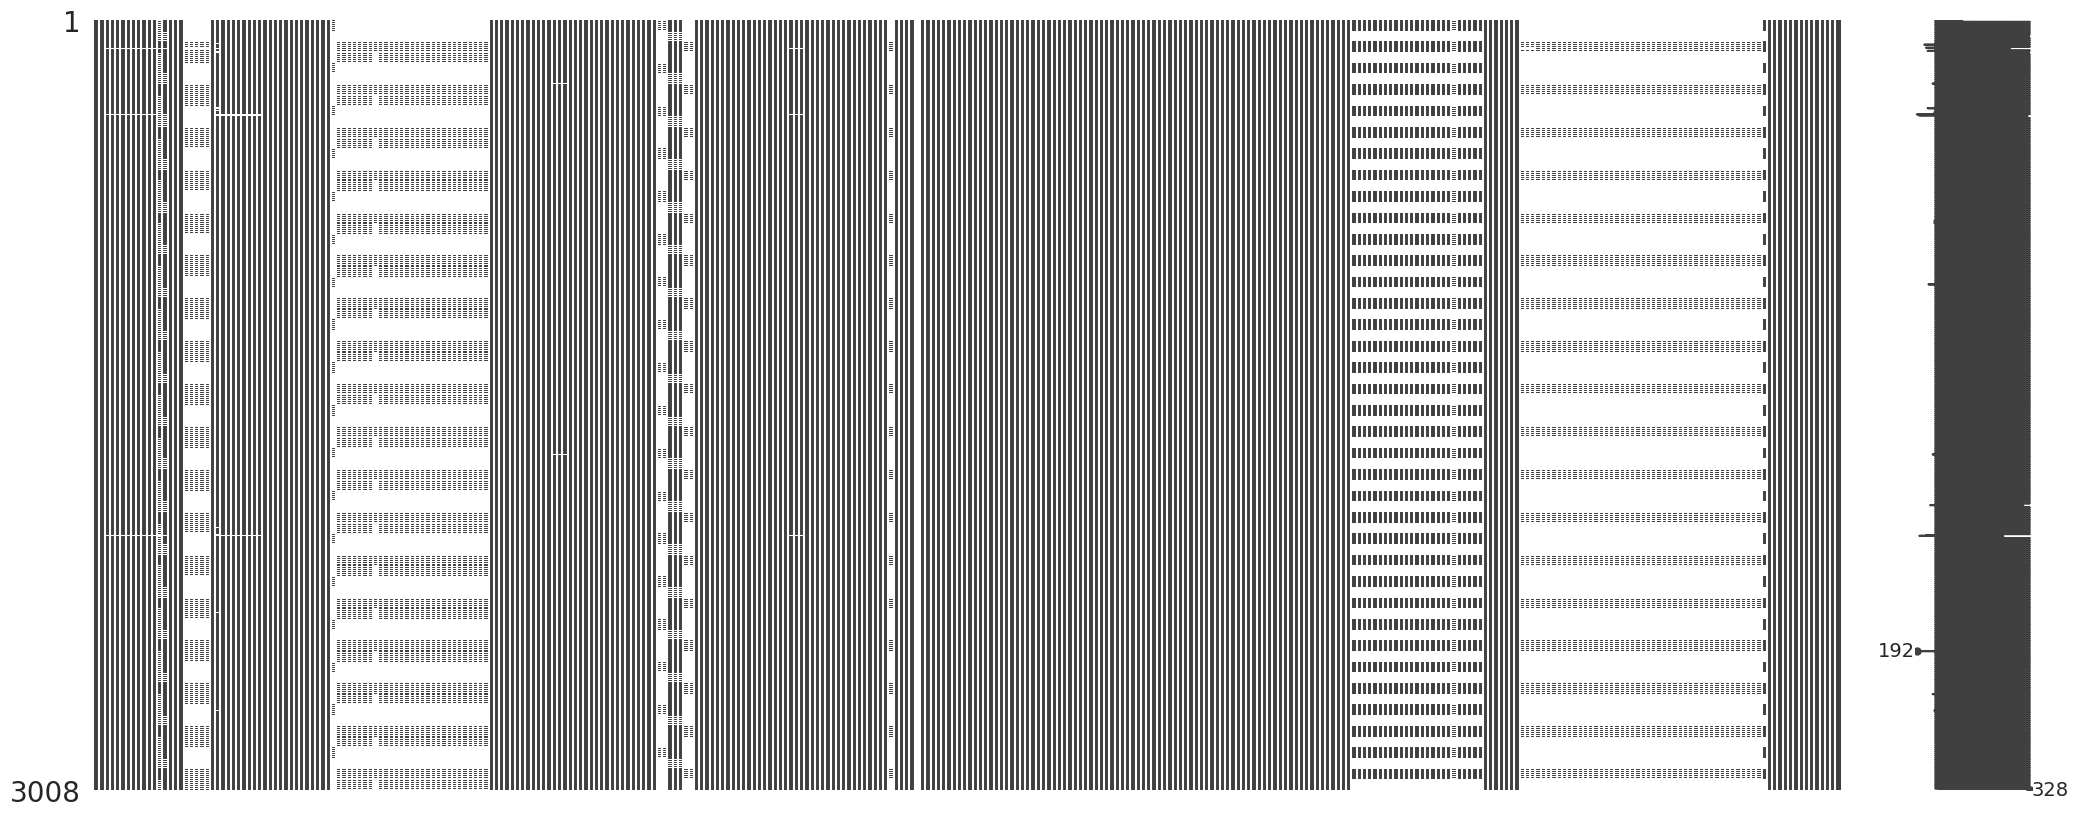

In [512]:
import missingno as msno

msno.matrix(raw_df)

In [513]:
(raw_df.isnull().sum().sort_values(ascending=False) / raw_df.shape[0]).to_csv('topmissing.csv')

Let's inspect what some of these features with almost all NaNs actually are.

In [514]:
what_is_this_feature('dem_health_ins_acs5yr_2012')
what_is_this_feature('d_pit_hless_pit_hud_share')



'4-year change in pit_hless_pit_hud_share values (2017 and 2013)'

In [515]:
raw_df['dem_health_ins_acs5yr_2012']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3003   NaN
3004   NaN
3005   NaN
3006   NaN
3007   NaN
Name: dem_health_ins_acs5yr_2012, Length: 3008, dtype: float64

Certainly if all of the values are NaN in a feature there is no predictive power in the feature, let's drop it.

In [516]:
raw_df.drop(['dem_health_ins_acs5yr_2012'], axis=1, inplace=True)

Some of these features with a large majority of missing vals are considered "Outcome" values and wouldn't be included in our predictive feature space anyway, so let's drop these target features and move to handle NaNs from there.

In [517]:
raw_df.isnull().sum().sort_values(ascending=False)

d_pit_hless_pit_hud_share        2635
d_pit_shelt_pit_hud_share        2635
d_pit_unshelt_pit_hud_share      2635
d_hou_pol_fedfundcoc             2632
d_dem_soc_asian_census_share     2632
                                 ... 
dem_soc_ed_hsgrad_acs5yr_2012       0
dem_soc_ed_hsgrad_acs5yr_2017       0
dem_soc_ed_lesshs_acs5yr_2012       0
cocnumber                           0
rural                               0
Length: 331, dtype: int64

In [518]:
what_is_this_feature('d_econ_sn_cashasst_xt')
what_is_this_feature('d_hou_pol_occhudunit_psh_hud')



'4-year change in hou_pol_occhudunit_psh_hud values (2017 and 2013)'

It seems that this dataframe used the difference in certain features between 2017 and 2013 to engineer a new feature. This dataset includes years that aren't 2017 and 2013, however, and therefore there are a lot of missing values. I'm not sure the usecase for these values, so let's just drop them.

In [519]:

difference_cols = raw_df.columns[["d_" in i[:2] for i in raw_df.columns ]].values
raw_df.drop(difference_cols, axis=1, inplace=True)
print(len(difference_cols), " columns dropped")

46  columns dropped


In [520]:
raw_df.drop(raw_df.columns[(raw_df.isnull().sum() == 2632)].values, axis=1, inplace=True)

Honestly, let's just drop all columns with NaNs in them, because there are 84 of them and I'm not really sure what they are. However, let's exclude the outcome features and simply drop those by row.

In [521]:
target = 'pit_hless_pit_hud_share'

In [522]:
print(f"There are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")

raw_df.drop([col for col in raw_df.columns[(raw_df.isnull().sum() != 0)].values if col != target], axis=1, inplace=True)

print(f"Dropped NaNs by column: there are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")

raw_df.dropna(inplace=True) # drop NaNs by rows

print(f"Dropping NaNs by rows: there are {(raw_df.isnull().sum() != 0).sum()} features with NaNs in them")


There are 90 features with NaNs in them
Dropped NaNs by column: there are 1 features with NaNs in them
Dropping NaNs by rows: there are 0 features with NaNs in them


In [523]:
raw_df.shape

(2994, 189)

Now that we have dropped a lot of columns, let's print out the description of those that remain to keep as a record.

In [531]:
dict_df = data_dict[[i in raw_df.columns.values for i in data_dict['Variable']]][['Variable', 'Variable Label']]
print(tabulate(dict_df, headers='keys', tablefmt='psql'))

+-----+----------------------------------+----------------------------------------------------------------------------------+
|     | Variable                         | Variable Label                                                                   |
|-----+----------------------------------+----------------------------------------------------------------------------------|
|   0 | year                             | year                                                                             |
|   1 | cocnumber                        | continuum of care number                                                         |
|  14 | econ_urb_urbanicity              | urbanicity category                                                              |
|  15 | coctag                           | tag(cocnumber)                                                                   |
|  16 | panelvar                         | CoC number used to set panel                                               

In [532]:
dict_df.to_csv("alldefs.csv")

It's helpful to look at the distribution of the types of columns that we have in our data. 

In [525]:
def type_of_features(list_of_features):
    return data_dict[[i in list_of_features for i in data_dict["Variable"]]]["Associated Domain"].value_counts()

type_of_features(raw_df.columns.values)

Demographic     55
Housing         51
Economic        23
Safety Net      16
Subgroup        14
Outcome         14
Local Policy     5
Identifier       4
Geography        4
Climate          3
Name: Associated Domain, dtype: int64

In [526]:
type_of_features(raw_df.columns.values).to_csv("domains.csv")

In [528]:
raw_df.describe()

year  econ_urb_urbanicity       coctag    panelvar  \
count  2994.000000          2994.000000  2994.000000  2994.00000   
mean   2013.500000             2.110888     0.124582   189.10688   
std       2.290796             0.972592     0.330300   108.95366   
min    2010.000000             1.000000     0.000000     1.00000   
25%    2012.000000             1.000000     0.000000    95.00000   
50%    2013.000000             2.000000     0.000000   189.00000   
75%    2015.000000             3.000000     0.000000   283.00000   
max    2017.000000             4.000000     1.000000   378.00000   

       hou_pol_fedfundcoc  dem_pop_pop_census  dem_pop_male_census  \
count         2994.000000        2.994000e+03         2.994000e+03   
mean            46.026693        8.403713e+05         4.136514e+05   
std            100.300219        1.219260e+06         6.003514e+05   
min              0.000000        2.934400e+04         1.452100e+04   
25%              6.872180        2.673888e+05         1.316482e+05   
50%             17.818525        4.840415e+05         2.368505e+05   
75%             42.870052        9.005882e+05         4.390850e+05   
max           1219.658440        1.105896e+07         5.516870e+06   

       dem_pop_female_census  dem_pop_child_census  dem_pop_adult_census  ...  \
count           2.994000e+03          2.994000e+03          2.994000e+03  ...   
mean            4.267199e+05          2.202053e+05          5.026509e+05  ...   
std             6.191073e+05          3.301880e+05          7.331893e+05  ...   
min             1.481600e+04          6.194000e+03          1.693200e+04  ...   
25%             1.364798e+05          6.798475e+04          1.603075e+05  ...   
50%             2.466060e+05          1.247525e+05          2.873480e+05  ...   
75%             4.642495e+05          2.350745e+05          5.454960e+05  ...   
max             5.542088e+06          3.204024e+06          6.329018e+06  ...   

       sub_high_cost_rent75  sub_high_cost_homeval75  sub_high_rent_share75  \
count           2994.000000              2994.000000            2994.000000   
mean               0.610220                 0.631597               0.600200   
std                0.487782                 0.482452               0.489939   
min                0.000000                 0.000000               0.000000   
25%                0.000000                 0.000000               0.000000   
50%                1.000000                 1.000000               1.000000   
75%                1.000000                 1.000000               1.000000   
max                1.000000                 1.000000               1.000000   

       tight_high_cost_rental_mkt  sub_tight_high_cost_rent  \
count                 2994.000000               2994.000000   
mean                     1.948898                  0.562124   
std                      1.342360                  0.496208   
min                      0.000000                  0.000000   
25%                      0.000000                  0.000000   
50%                      3.000000                  1.000000   
75%                      3.000000                  1.000000   
max                      4.000000                  1.000000   

       sub_west_coast_all_urb  sub_west_census   major_city     suburban  \
count             2994.000000      2994.000000  2994.000000  2994.000000   
mean                 0.141617         0.193387     0.277889     0.426854   
std                  0.348715         0.395020     0.448033     0.494703   
min                  0.000000         0.000000     0.000000     0.000000   
25%                  0.000000         0.000000     0.000000     0.000000   
50%                  0.000000         0.000000     0.000000     0.000000   
75%                  0.000000         0.000000     1.000000     1.000000   
max                  1.000000         1.000000     1.000000     1.000000   

             rural  
count  2994.000000  
mean      0.295257  
std       0.

#### Managing Datatypes

In [411]:
raw_df = raw_df.convert_dtypes() # this didn't do much
categorical_features = list(raw_df.columns[((raw_df.dtypes != "Int64") & (raw_df.dtypes != "Float64"))].values) # we should drop these features before modelling

In [412]:
raw_df.groupby(['cocnumber']).sum()

/tmp/ipykernel_2760723/501702472.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  raw_df.groupby(['cocnumber']).sum()


year  econ_urb_urbanicity  coctag  panelvar  hou_pol_fedfundcoc  \
cocnumber                                                                     
AK-500     16108                   24       1         8           228.45752   
AK-501     16108                    8       1        16            60.10038   
AL-500     16108                   16       1        24           683.23731   
AL-501     16108                   24       1        32            296.7977   
AL-502     16108                    8       1        40            42.50069   
...          ...                  ...     ...       ...                 ...   
WV-500     16108                    8       1      2992            34.66596   
WV-501     16108                    8       1      3000           144.90502   
WV-503     16108                   16       1      3008            104.7769   
WV-508     16108                    8       1      3016           241.68885   
WY-500     16108                    8       1      3024            25.99368   

           dem_pop_pop_census  dem_pop_male_census  dem_pop_female_census  \
cocnumber                                                                   
AK-500                2370146              1209126                1161020   
AK-501                3444663              1825871                1618792   
AL-500                7575279              3626627                3948652   
AL-501                4852056              2336501                2515555   
AL-502                2130112              1035103                1095009   
...                       ...                  ...                    ...   
WV-500                1168112               567056                 601056   
WV-501                1103300               537988                 565312   
WV-503                2240164              1087585                1152579   
WV-508               10242641              5089408                5153233   
WY-500                4589664              2342139                2247525   

           dem_pop_child_census  dem_pop_adult_census  ...  \
cocnumber                                              ...   
AK-500                   658856               1512869  ...   
AK-501                   986690               2138273  ...   
AL-500                  1978610               4568123  ...   
AL-501                  1279752               2833408  ...   
AL-502                   516943               1236250  ...   
...                         ...                   ...  ...   
WV-500                   259418                678959  ...   
WV-501                   259597                655234  ...   
WV-503                   525690               1332187  ...   
WV-508                  2392778               6121316  ...   
WY-500                  1213792               2755815  ...   

           sub_high_cost_rent75  sub_high_cost_homeval75  \
cocnumber                                                  
AK-500                        8                        8   
AK-501                        6                        4   
AL-500                        4                        4   
AL-501                        4                        4   
AL-502                        4                        4   
...                         ...                      ...   
WV-500                        4                        4   
WV-501                        4                        4   
WV-503                        4                        4   
WV-508                        4                        4   
WY-500                        4                        4   

           sub_high_rent_share75  tight_high_cost_rental_mkt  \
cocnumber                                                      
AK-500                         6                          26   
AK-501                         4                          14   
AL-500                         4                          12   
AL-501                         4                          12   
AL-502    

## Graphing Targets

Let's start with the target of `pit_hless_pit_hud_share`. As explored before, this variable represents the number of homeless per 10,000 population and therefore represents a normalized target feature.

In [413]:
target = 'pit_hless_pit_hud_share'
y_balanced = raw_df[target]

In [414]:
total_homeless_rates = pd.concat([raw_df[['cocnumber', 'state_abr', 'year']], y_balanced], axis=1)
total_homeless_rates[total_homeless_rates['year'] == 2017]

cocnumber state_abr  year  pit_hless_pit_hud_share
7       AK-500        AK  2017                37.931778
15      AK-501        AK  2017                16.143341
23      AL-500        AL  2017                11.395156
31      AL-501        AL  2017                 9.737114
39      AL-502        AL  2017                 5.843235
...        ...       ...   ...                      ...
2975    WV-500        WV  2017                 8.293972
2983    WV-501        WV  2017                15.034946
2991    WV-503        WV  2017                11.624221
2999    WV-508        WV  2017                 5.228957
3007    WY-500        WY  2017                14.925373

[374 rows x 4 columns]

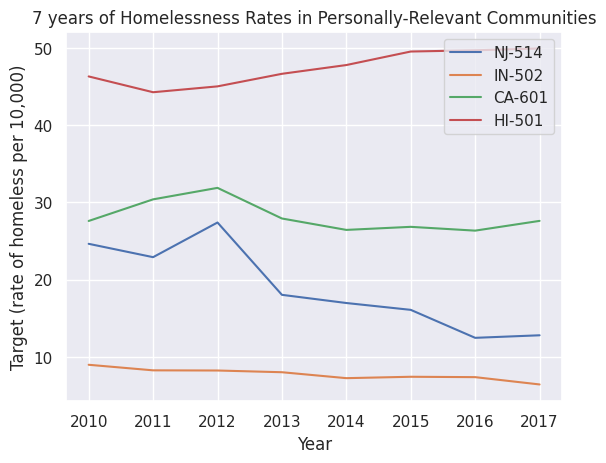

In [415]:
relevant_cocnumbers = ["NJ-514", "IN-502", "CA-601", "HI-501"]
ax = plt.subplot(1, 1, 1)
for coc_number in relevant_cocnumbers:
    temp_df = raw_df[raw_df["cocnumber"] == coc_number]
    plt.plot(temp_df['year'], temp_df[target])
    
plt.legend(relevant_cocnumbers)
plt.rc('font', size=7)
plt.xlabel("Year")
plt.ylabel("Target (rate of homeless per 10,000)")
plt.title("7 years of Homelessness Rates in Personally-Relevant Communities");

Plotting some violin plots for the indicator variables in our dataset.

In [416]:
raw_df[target] = raw_df[target].astype('float64')

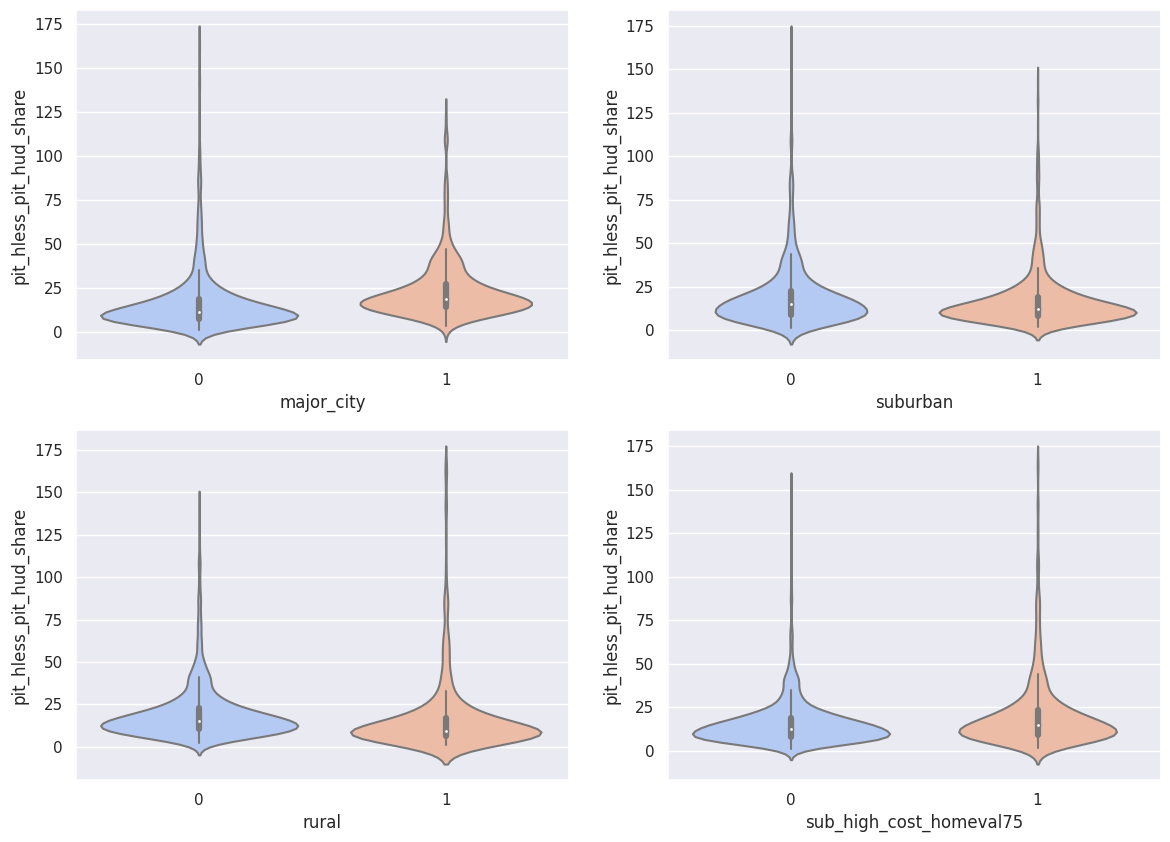

In [417]:
indicators = ['major_city', 'suburban', 'rural', 'sub_high_cost_homeval75']
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
ax = ax.flatten()

sns.set(font_scale=1)
for i, ind in enumerate(indicators):
    ax[i]
    sns.violinplot(x=ind, y=target, data=raw_df, palette="coolwarm", ax=ax[i])
    

These violin plot imply that the distribution of the target variable may be slightly different depending on some of our indicator variables. For example, the two features of rural and major city seem to shift the distribution of the target (at least shifting the mode of the distribution). 

Additionally, these graphs show that there may exist some outliers in our target dataset. Let's take a look at these outliers -- defined to have a target value more than 2 standard deviations away from the mean. In this case, we are only looking at the outliers on the upper side of rates of homelessness, in which the rates of homelessness are significantly higher than average.

Text(0, 0.5, 'Rates of homelessness (per 10,000 people)')

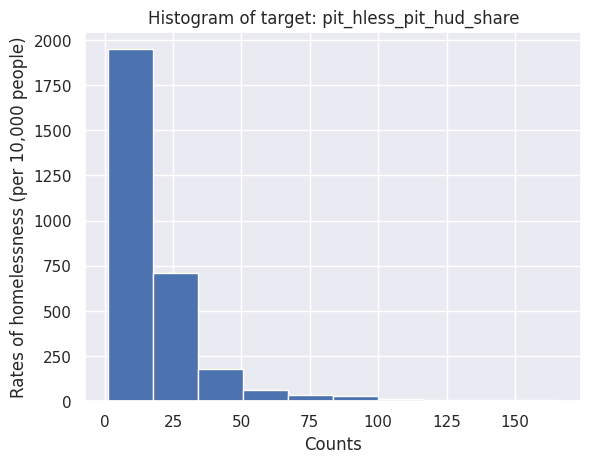

In [418]:
plt.hist(raw_df[target])
plt.title(f'Histogram of target: {target}');
plt.xlabel('Counts')
plt.ylabel('Rates of homelessness (per 10,000 people)')

In [534]:
high_outlier_rows = raw_df[raw_df[target] > raw_df[target].mean() + raw_df[target].std() * 3]

high_outlier_rows.cocnumber.value_counts().to_csv("outlier_cocs.csv")
high_outlier_rows.cocnumber.value_counts()


CA-509    8
FL-604    8
DC-500    8
FL-518    7
CA-508    6
CA-501    5
NY-600    5
CA-614    5
CA-504    4
FL-519    3
FL-505    3
CA-522    3
FL-517    2
LA-503    2
CA-603    1
CA-524    1
MD-508    1
MO-602    1
NY-607    1
Name: cocnumber, dtype: int64

I tried to identify the outliers on the low end of rates of homelessness, although, as apparnet by the histogram, our target set is heavily skewed and with a long right tail. With a mean of 18.75 and a standard deviation of 18.45, no communities are on the lower end of outliers.

We can identify the CoC communities that are most likely to have an outlier rate of homelessness. Some communities to keep in mind are `CA-509`, `DC-500`, `FL-604`. There seem to be some states that are more likely to be outliers, let's take a look at the distribution of states of the outlier rows.

In [420]:
high_outlier_rows['state_abr'].value_counts()

CA    33
FL    23
DC     8
NY     6
LA     2
MD     1
MO     1
Name: state_abr, dtype: Int64

As expected, there are only a few states that are often extreme outliers for rates of homelessness. Taking a look at the states with the highest amount of extreme outliers, California and Florida have a few similarities that may suggest further correlational features to add. For example, both states have relatively warm weather. This may suggest that including average temperature + temperature fluctuation year over year for each community may improve predictability.

## Geospatial Graphs

It is important to be able to visualize our CoC communities to see exactly what each row of data in our dataset mean. Let's import a CoC regional map dataset from [here](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/about) to map the data geospatially.

In [421]:
import geopandas as gpd

In [422]:
# data from: https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/explore?location=14.217388%2C129.771645%2C2.79
geo_df = gpd.read_file("data/Continuum_of_Care_(CoC)_Grantee_Areas.geojson")

In [423]:
geo_df.YEAR

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
380    2021
381    2021
382    2021
383    2021
384    2021
Name: YEAR, Length: 385, dtype: object

In [539]:
feature = "SH_VETS"
geo_df[feature] = geo_df[feature].astype('float')

In [424]:
coc_areas_data_dict = pd.read_excel('./data/DD_Continuum_of_Care_(CoC)_Grantee_Areas.xlsx')
coc_areas_data_dict.head()

Column Name                                 Column Description       Type  \
0    OBJECTID  In ArcGIS, a system-managed value that uniquel...     NUMBER   
1     COCNAME                             Continuum of Care Name  NVARCHAR2   
2      STUSAB                                 State Abbreviation  NVARCHAR2   
3      COCNUM  Six-Digit Unique identifier for each Continuum...  NVARCHAR2   
4  STATE_NAME                                         State Name  NVARCHAR2   

  Width  
0   NaN  
1    85  
2   255  
3     6  
4    20

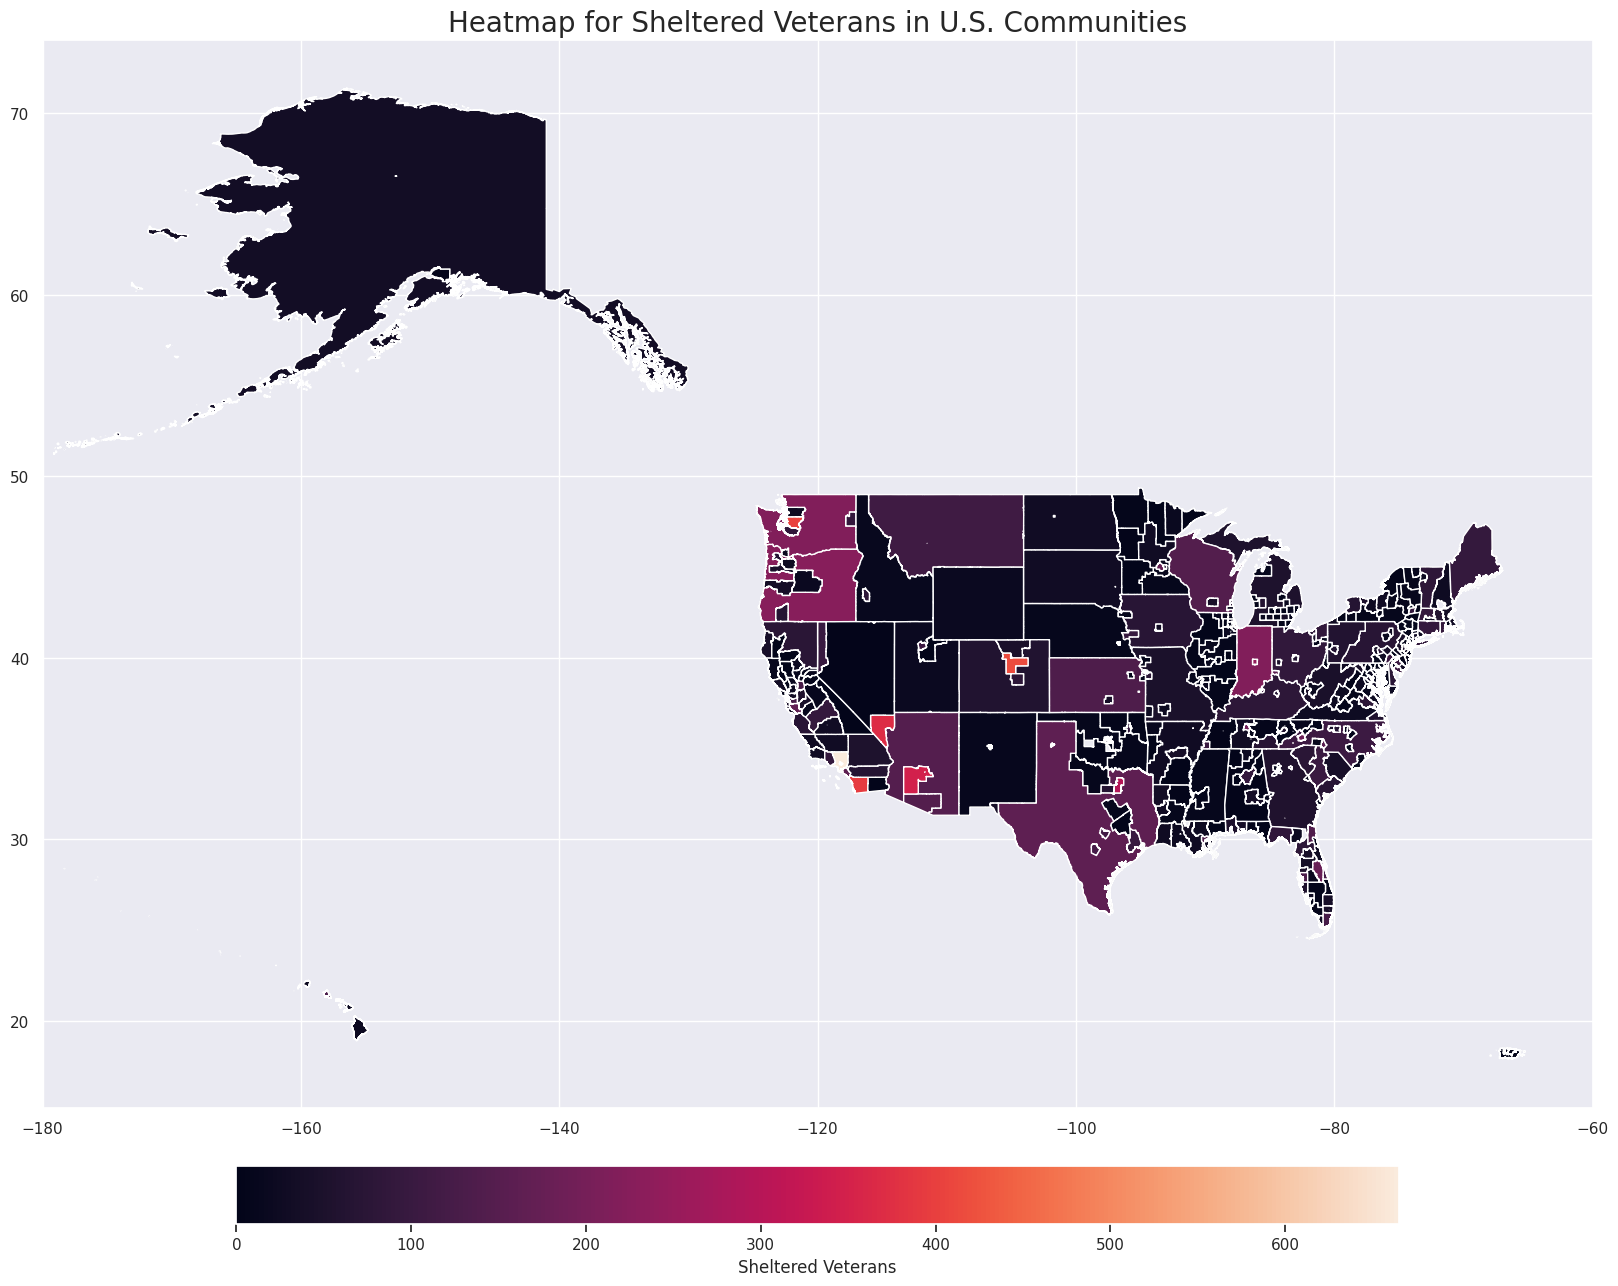

In [554]:
def geo_plot_feature(feature):
    fig = plt.figure(figsize=(20, 20))
    plt.rc('font', size=30)
    ax = fig.add_subplot(111)
    geo_df[feature] = geo_df[feature].astype('float')
    title = coc_areas_data_dict.loc[coc_areas_data_dict["Column Name"] == feature, "Column Description"].values[0]
    geo_df.plot(feature, ax=ax, legend=True, legend_kwds={'label': title, 
                             'orientation': "horizontal", "shrink": 0.75, "anchor": (0.5, 2)});
    ax.set_xlim(-180, -60);
    ax.set_title(f"Heatmap for {title} in U.S. Communities", fontsize=20);
    
geo_plot_feature("SH_VETS")

In [426]:
print(tabulate(coc_areas_data_dict[['Column Name', 'Column Description']], headers='keys', tablefmt='psql'))

+----+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Column Name       | Column Description                                                                                                                                                |
|----+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | OBJECTID          | In ArcGIS, a system-managed value that uniquely identifies a record or feature.                                                                                   |
|  1 | COCNAME           | Continuum of Care Name                                                                                                                                            |
|  2 | STUSAB            | State Abbreviation

[map of data](https://hudgis-hud.opendata.arcgis.com/datasets/HUD::continuum-of-care-coc-grantee-areas/explore?location=34.773931%2C-86.921770%2C4.75&style=Shape__Length)

Let's take a look at the CoC areas that we identified to be outliers of high rates of homelessness.

In [555]:
# extracting the CoC identifier for the top outliers
high_outlier_CoCs = high_outlier_rows.cocnumber.value_counts().index.values[:10]

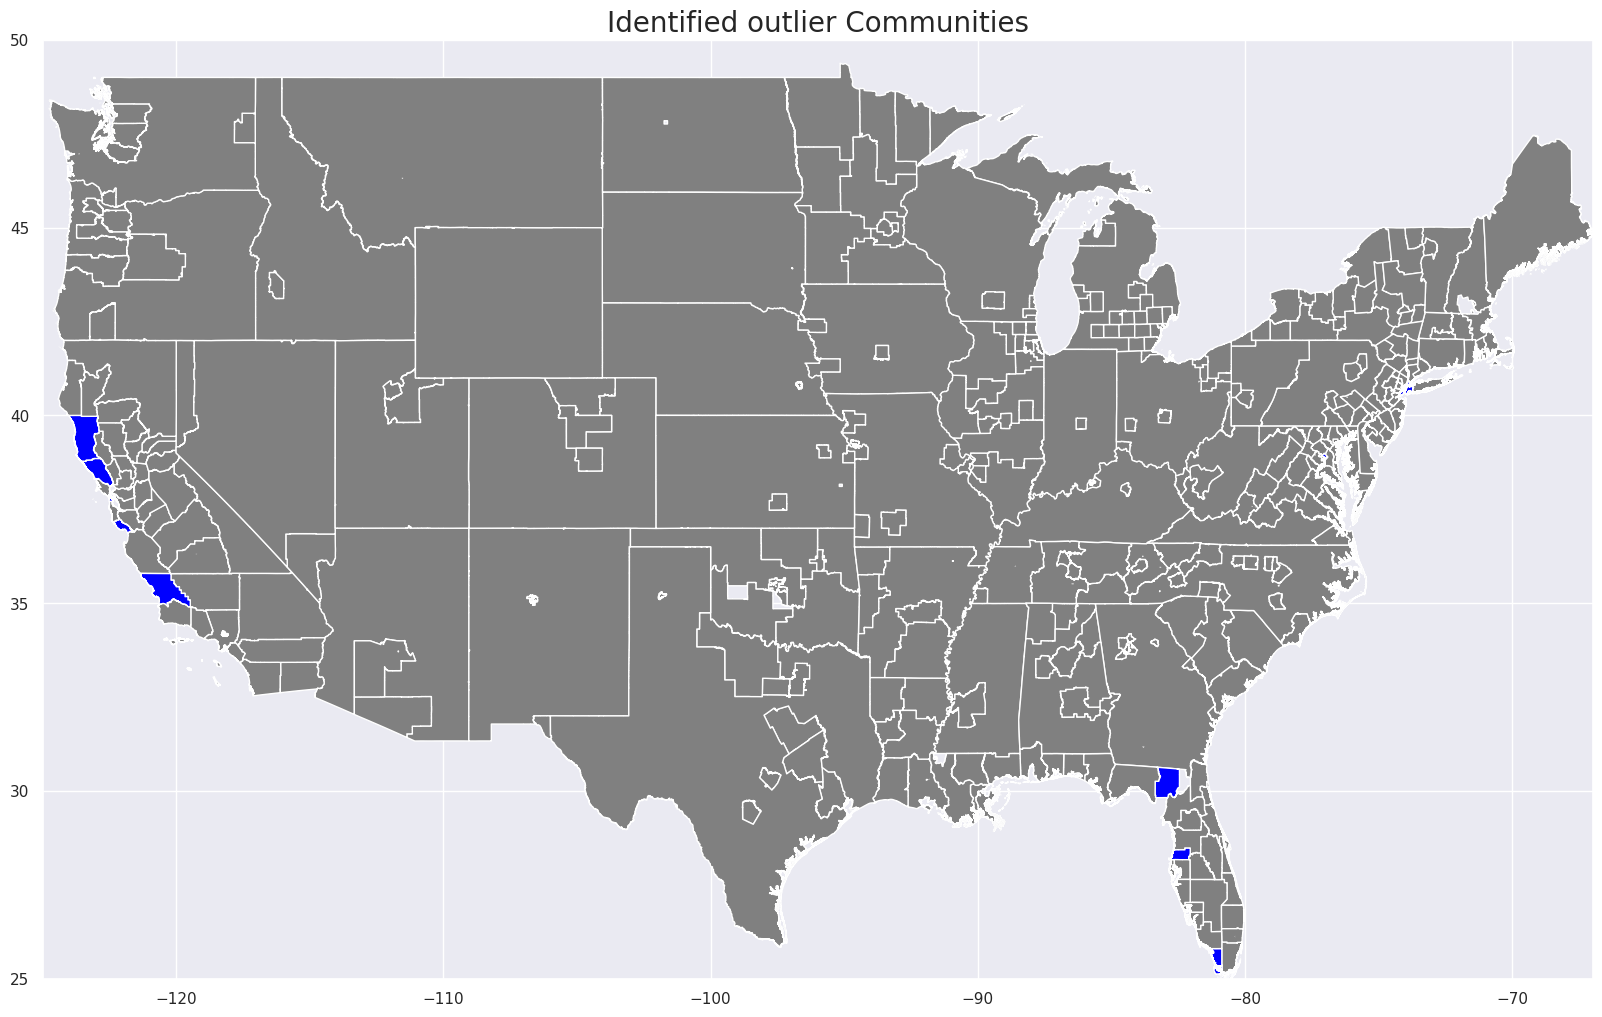

In [561]:
fig = plt.figure(figsize=(20, 20))
plt.rc('font', size=20)

ax = fig.add_subplot(111)
geo_df.plot(color=["blue" if cocnum in high_outlier_CoCs else "grey" for cocnum in geo_df['cocnumber']], ax=ax);
ax.set_xlim(-125, -67);
ax.set_ylim(25, 50);
ax.set_title("Identified outlier Communities", fontsize=20);

With 100+ predictor columns, we are in need of performing feature analysis. Some questions we want to answer are: which features are the most predictive of the target? Which non-target features are correlated and might impact a multi-variable linear model. 

/tmp/ipykernel_2760723/2132985898.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr(), xticklabels=[], yticklabels=[])


Text(0.5, 1.0, '(a)')

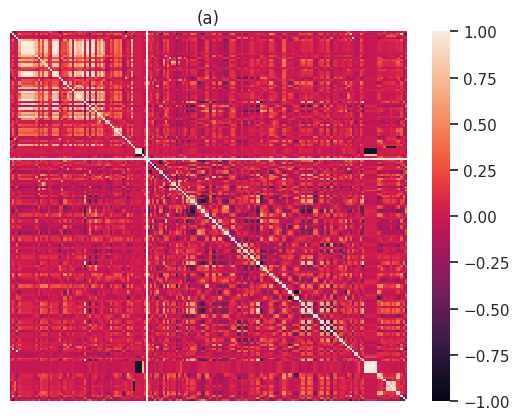

In [563]:
plt.rc('font', size=5)
ax = plt.axes()
sns.heatmap(raw_df.corr(), xticklabels=[], yticklabels=[])
ax.set_title('(a)')


/tmp/ipykernel_2760723/3784780972.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df[raw_df.columns.values[:15]].corr())


Text(0.5, 1.0, '(b)')

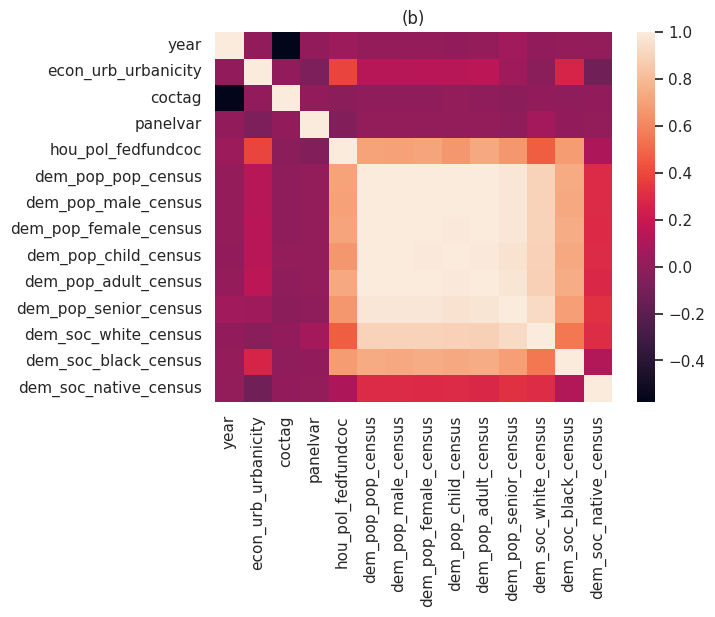

In [564]:
plt.rc('font', size=1)
ax = plt.axes()
sns.heatmap(raw_df[raw_df.columns.values[:15]].corr())
ax.set_title('(b)');

It's pretty hard to determine from the specific collinearity of features from this correlation map. Let's first plot the top 10 features that are correlated with our target feature of `pit_hless_pit_hud_share`

In our final model, however, we won't have access to "Outcome" variables that are in this data. Before we analyze correlation of the features let's drop the Outcome features that we aren't going to be using in prediction.

In [431]:
[i for i in data_dict[[i in ["Secondary Outcome", "Outcome"] for i in data_dict['Associated Domain']]]['Variable'].values if i in raw_df.columns.values]


['pit_miss',
 'odd_flag',
 'pit_hless_balance',
 'pit_shelt_balance',
 'pit_unshelt_balance',
 'unbalance_flag',
 'pit_hless_pit_hud_share',
 'missing',
 'flag_d_hless',
 'flag_xt_hless',
 'flag_d_shelt',
 'flag_xt_shelt',
 'flag_d_unshelt',
 'flag_xt_unshelt']

In [565]:
# identify the outcome features, exclude them in correlation
outcome_features = [i for i in data_dict[[i in ["Secondary Outcome", "Outcome"] for i in data_dict['Associated Domain']]]['Variable'].values if i in raw_df.columns.values]
identifier_features = [i for i in data_dict[data_dict['Associated Domain'] == 'Identifier']['Variable'].values if i in raw_df.columns.values]

corr_df = raw_df.drop(outcome_features + identifier_features + ["state_abr"], axis=1)
corr_df = pd.concat([corr_df, raw_df[target]], axis=1)


In [567]:
high_corr_features = abs(corr_df.corr()[target]).sort_values(ascending=False)[1:20]
print(high_corr_features)
high_corr_features_names = high_corr_features.index.values

hou_mkt_rentshare_acs5yr_2012       0.398883
hou_mkt_burden_sev_own_acs_2012     0.395400
hou_mkt_rentshare_acs5yr_2017       0.391802
hou_mkt_burden_sev_own_acs_2017     0.356333
sub_west_coast                      0.354410
dem_health_alcdeath_IMHE_2015       0.340880
hou_mkt_homeval_acs5yr_2012         0.339177
hou_mkt_burden_sev_own_acs_diff     0.336216
sub_west_census                     0.327139
hou_mkt_homeval_acs5yr_2017         0.326502
hou_mkt_ovrcrowd_acs5yr_2017        0.316307
econ_labor_topskill_acs5yr_2012     0.314176
env_wea_avgtemp_noaa                0.297431
econ_labor_incineq_acs5yr_2017      0.289541
hou_mkt_ovrcrowd_acs5yr_2012        0.288616
hou_mkt_burden_sev_rent_acs_2017    0.286337
econ_labor_midskill_acs5yr_2017     0.285550
census_division                     0.281149
census_region                       0.277349
Name: pit_hless_pit_hud_share, dtype: float64


In [568]:
high_corr_features.to_csv("high_corr_features.csv")

Now that we know the top 20 features that are linearly correlated with the target variable we can look at what types of features these are. 

In [434]:
type_of_features(high_corr_features_names)

Housing        10
Economic        3
Geography       2
Subgroup        2
Climate         1
Demographic     1
Name: Associated Domain, dtype: int64

Of the top 20 correlated features in absolute value with our target variable, 10 of them are related to the housing domain.

Our dataset includes a very robust set of independent variables that may introduce multicollinearity into our model. Multicollinearity reduces the explainability of our model as well as introduces overfitting problems for some machine learning models, including regression. 

To combat this, we could perform feature selection. We've already identified the top features that correlate with our target feature; however, it is additionally important to reduce redundancy in our dataset: taking only one of any two features that are collinear in our dataset will reduce multicollinearity and solve this problem. 

However, as long as we avoid making conclusions based on the coefficients of a regression model in our analysis, we should be fine.

# Modelling

## Linear Regression

In [435]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import random

In [436]:
np.random.seed(30)
random.seed(30)

We need to consider how we deal with categorical variables. The categorical variable that we have to deal with is state. This dataset already includes indicators for regions, in this way the dataset has already encoded state so let's just drop it. 

In [437]:
# Make sure X is defined
X = raw_df.drop(outcome_features + identifier_features +
                categorical_features, axis=1)


In [438]:
type_of_features(X.columns.values)

Demographic     55
Housing         51
Economic        23
Safety Net      16
Subgroup        14
Local Policy     5
Climate          3
Geography        3
Name: Associated Domain, dtype: int64

In [443]:

target_feature = 'pit_hless_pit_hud_share'
y = raw_df[target_feature]

In [444]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def cross_validate_lr_singlecol(col):
    scoring = cross_validate(LinearRegression(), X_train[col].values.reshape(-1, 1), y_train, scoring='r2', return_train_score=True)
    
    return print(f"{col}: \ttrain: {round((scoring['train_score']*-1).mean(), 3)}  \ttest: {round((scoring['test_score']*-1).mean(), 3)}")


In [490]:
def cross_validate_reg(reg):
    scoring = cross_validate(reg, X_train, y_train, scoring='r2', cv=5, return_train_score=True)
    scoring

    print("Avg Train Score: ", scoring['train_score'].mean())
    print("Avg Test Score: ", scoring['test_score'].mean())


    print(f"Standard Deviation CV Train Score: {np.std(scoring['train_score'])}")
    print(f"Standard Deviation CV Test Score: {np.std(scoring['test_score'])}")



In [491]:
cross_validate_reg(LinearRegression())

Avg Train Score:  0.644981178718188
Avg Test Score:  0.5717882605924812
Standard Deviation CV Train Score: 0.013183128940558094
Standard Deviation CV Test Score: 0.07002381599795696


In [569]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"R-Squared Score on Train Set: {r2_score(y_train, lr.predict(X_train))}")
print(f"R-Squared Score on Test Set: {r2_score(y_test, lr.predict(X_test))}")

R-Squared Score on Train Set: 0.6401262900682146
R-Squared Score on Test Set: 0.541278673846841


Let's take some time to make observations on the above cross validation. Most noticably, the testing score is not always equal to the train score. In some cases the test score is much lower than the train score -- implying that the model is overfit. 

Let's see if we can add a regularizer to manage this overfitting.

## Ridge Regression

### Cross-validation

In [447]:
from sklearn.linear_model import Ridge

In [492]:
cross_validate_reg(Ridge())

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.33112e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=5.46612e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=3.17063e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.78667e-22): result may not be accurate.
  return 

Avg Train Score:  0.6251584402343848
Avg Test Score:  0.5620623537393563
Standard Deviation CV Train Score: 0.013522049056034532
Standard Deviation CV Test Score: 0.0645711437373577


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.96313e-22): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


~~While the average test score did increase, it increased from `0.842` to `0.871`. When compared to the training score of roughly `0.95`, the model is still overfitting to the training data.~~

### Hyperparameter Tuning of Ridge Regression:

In [449]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


In [496]:
model = {"estimator": Ridge(),
         "params": {
    "alpha": [0, 1, 10, 100, 1000],
    "normalize": [True, False],
    "solver": ['auto', 'svd', 'cholesky', 'lsqr'],
    "random_state": [30],
}}

gs = GridSearchCV(estimator = model["estimator"], param_grid = model["params"], scoring="r2",  cv = 5, return_train_score=True)
    
# fit the grid search object
gs.fit(X_train, y_train)
# get evaluations and print
print("-"*50)
print("estimator:", gs.best_estimator_)
print("Cross validated mean score:", gs.best_score_)

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a pr

--------------------------------------------------
estimator: Ridge(alpha=0, normalize=True, random_state=30)
Cross validated mean score: 0.5806035794475914


In [497]:
print(f"Grid Search Best Params: {gs.best_estimator_}")
print(f"Grid Search Best Mean Validated Score: {gs.best_score_}")

Grid Search Best Params: Ridge(alpha=0, normalize=True, random_state=30)
Grid Search Best Mean Validated Score: 0.5806035794475914


This is unexpected. The alpha value for the optimized hyperparameter is 0. However, when `alpha=0` the `RidgeRegression` is equivalent to using the `LinearRegression`. Intrinsically the model is penalized for having coefficients close to zero, perhaps our dataset isn't optimized for making every coefficient non-zero. Alternatively, let's apply another regularizer that optimizes for fewer non-zero coefficients, known as `lasso` regression.

In [498]:
cross_validate_reg(gs.best_estimator_)

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a pr

Avg Train Score:  0.6535736578358892
Avg Test Score:  0.5806035794475914
Standard Deviation CV Train Score: 0.01350611662446059
Standard Deviation CV Test Score: 0.06536988713394644


To compare to alternative models, let's evaluate on the test set.

In [494]:
rr = gs.best_estimator_
rr.fit(X_train, y_train);


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/tmp/ipykernel_2760723/810596259.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  rr.fit(X_train, y_train);
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packag

In [495]:
print(f"R-Squared Score on Train Set: {r2_score(y_train, rr.predict(X_train))}")
print(f"R-Squared Score on Test Set: {r2_score(y_test, rr.predict(X_test))}")

R-Squared Score on Train Set: 0.6234568630355652
R-Squared Score on Test Set: 0.5377208873470635


### Feature Importance Ridge Regression:

What does this model use as it's important features? Ridge Regression doesn't have an internal method for returning feature importances. While coefficients are present and could be analyzed in comparison to each other, Ridge penalizes large coefficients, therefore influencing the interpreted importances in prediction. Additionally, coefficients are only interpretable if the incoming data is normalized, which it isn't. Instead, we'll use permutation importance to determine which feature holds the most predictive power.

In [455]:
from sklearn.inspection import permutation_importance

# permutation importance function, source: https://scikit-learn.org/stable/modules/permutation_importance.html
def feature_importance(model, X_val, y_val):
    r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0, scoring='r2')

    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
            print(f"{model.feature_names_in_[i]:<15}"
                f"{r.importances_mean[i]:.3f}"
                f" +/- {r.importances_std[i]:.3f}")
    return r.importances_mean.argsort()[::-1]




In [456]:
rr_feature_importance = feature_importance(rr, X_test, y_test);

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_permuted.iloc[:, col_idx] = col
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_permuted.iloc[:, col_idx] = col
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In 

dem_pop_male_census12.418 +/- 0.503
dem_pop_female_census7.960 +/- 0.355
dem_soc_white_census7.295 +/- 0.318
dem_pop_adult_census5.021 +/- 0.234
econ_labor_force_pop_BLS3.858 +/- 0.162
econ_labor_emp_pop_BLS2.110 +/- 0.095
hou_mkt_homeage1940_acs5yr_20172.026 +/- 0.097
hou_mkt_units_census2.003 +/- 0.109
dem_pop_pop_census1.489 +/- 0.073
dem_soc_hispanic_census1.260 +/- 0.059
hou_mkt_homeval_acs5yr_20121.173 +/- 0.058
hou_mkt_homeage1940_acs5yr_20120.906 +/- 0.056
dem_soc_black_census0.811 +/- 0.054
econ_labor_medinc_acs5yr_20120.534 +/- 0.036
hou_mkt_homeage_acs5yr_20120.449 +/- 0.036
hou_mkt_medrent_acs5yr_20170.363 +/- 0.029
dem_pop_child_census0.356 +/- 0.028
econ_sn_ssdi_SSA0.337 +/- 0.026
dem_mort_lifeexp_IMHE_20150.297 +/- 0.021
hou_mkt_renter_count_evlab0.220 +/- 0.022
econ_labor_pov_pop_census0.220 +/- 0.021
econ_sn_ssi_pay_SSA0.204 +/- 0.019
dem_soc_ed_hsgrad_acs5yr_20170.161 +/- 0.016
econ_urb_urbanicity0.143 +/- 0.017
dem_pop_senior_census0.118 +/- 0.015
dem_soc_singadult_a

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_permuted.iloc[:, col_idx] = col
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  X_permuted.iloc[:, col_idx] = col
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/inspection/_permutation_importance.py:61: FutureWarning: In 

In [457]:
rr_important_features = [rr.feature_names_in_[i] for i in rr_feature_importance[:20]]

for i, feat in enumerate(rr_important_features):
    print(f"{i}: {feat} is {what_is_this_feature(feat)}")

0: dem_pop_male_census is total male population, intercensal estimate
1: dem_pop_female_census is total female population, intercensal estimate
2: dem_soc_white_census is total white alone (non-hispanic) population, intercensal estimate
3: dem_pop_adult_census is total population ages 20-64, intercensal estimate
4: econ_labor_force_pop_BLS is total population in the labor force
5: econ_labor_emp_pop_BLS is total employed population
6: hou_mkt_homeage1940_acs5yr_2017 is 2016 percentage of housing units built before 1940
7: hou_mkt_units_census is total number of housing units, intercensal estimate
8: dem_pop_pop_census is total population, intercensal estimate
9: dem_soc_hispanic_census is total latino/hispanic (all races) population, intercensal estimate
10: hou_mkt_homeval_acs5yr_2012 is 2011 median home value
11: hou_mkt_homeage1940_acs5yr_2012 is 2011 percentage of housing units built before 1940
12: dem_soc_black_census is total black alone (non-hispanic) population, intercensal es

In [458]:
type_of_features(rr_important_features)


Demographic    9
Housing        5
Economic       3
Safety Net     3
Name: Associated Domain, dtype: int64

In [459]:
rr_least_important_features = [rr.feature_names_in_[i] for i in rr_feature_importance[-21:]]

for i, feat in enumerate(rr_least_important_features):
    print(f"{i}: {feat} is {what_is_this_feature(feat)}")

0: econ_labor_unemp_pop_BLS is total unemployed population
1: dem_health_mhlth_chr_share_2017 is 2016 share of mental health care providers to total population
2: hou_mkt_density_census is housing units estimate divided by square miles
3: fhfa_hpi_2009 is 2009 base year house price index (HPI), from FHFA
4: evict_flag is flag for missing eviction rate value
5: sub_tight_high_cost_rent is indicator for tight, high cost rental market CoCs
6: dem_soc_singadult_acs5yr_2012 is 2011 percentage of children living with a single parent
7: hou_pol_hlessconduct_total is total count of prohibited conduct laws
8: dem_pop_mig_census is net migration from year-1 to year, intercensal estimate
9: econ_sn_cashasst_acs5yr_diff is change in econ_sn_cashasst_acs5yr values (2016 and 2011)
10: sub_low_rent_vacancy is indicator for CoCs with rental vacancy rates <= 5 percent
11: hou_mkt_ovrcrowd_acs5yr_diff is change in hou_mkt_ovrcrowd_acs5yr values (2016 and 2011)
12: env_wea_precip_noaa is total January pr

In [460]:
type_of_features(rr_least_important_features)

Housing         8
Demographic     5
Economic        3
Subgroup        2
Local Policy    1
Climate         1
Safety Net      1
Name: Associated Domain, dtype: int64

My hypothesis was that features that involve weather will hold predictive power for rates of homelessness. Contrarily, none of the top 20 features determined through permutation importane for the Ridge Regression modle include weather-based statistics. Surprisingly, looking at the bottom 20 features, there are no weather-based features.

Interestingly, the feature of `sub_west_coast` is the 15th least important feature. When looking at the identified outlier communities (from EDA), we can see that there is a large amount of high rates of homelessness along the west coast.

Also, the features that include `flag` in the name serve to represent communities that had missing data. It is interesting to note that features to mark communities with missing data are unimportant towards predicting homelessness. A conclusion thinking that a community's inability to report certain statistics is significant towards its ability to support and prevent homelessness is less likely.

However, permutation importance as a means for determining feature importance suffers from cross-correlated feature spaces ([source](https://towardsdatascience.com/stop-permuting-features-c1412e31b63f)). To start, the top 20 features identified thorugh permutation importance are correlated through inspection. Take for example the two features of `dem_pop_male_census` and `dem_pop_female_census`, it is obvious for how these two features are highly correlated. Adding on, the correlation heat map from figure (x) is 

## LassoRegression

### Cross-validation

In [462]:
from sklearn.linear_model import Lasso

cross_validate_reg(Lasso())

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.660e+05, tolerance: 6.286e+01
  model = cd_fast.enet_coordinate_descent(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.711e+05, tolerance: 6.911e+01
  model = cd_fast.enet_coordinate_descent(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

Avg Test Score:  0.5027220726376507
Avg Train Score:  0.5373898728580219
Standard Deviation CV Train Score: 0.011890702289973668
Standard Deviation CV Test Score: 0.052634761113487354


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.596e+05, tolerance: 6.270e+01
  model = cd_fast.enet_coordinate_descent(


### Hyperparameter Tuning of Lasso Regression:

In [463]:
model = {"estimator": Lasso(),
         "params": {
    "alpha": [0, 1, 10, 100, 1000],
    "normalize": [True, False],
    "selection": ['cyclic', 'random'],
    "random_state": [30],
}}

gs = GridSearchCV(estimator = model["estimator"], param_grid = model["params"], scoring="r2",  cv = 5, return_train_score=True)
    
# fit the grid search object
gs.fit(X_train, y_train)
# get evaluations and print
print("-"*50)
print("estimator:", gs.best_estimator_)
print("Cross validated mean score:", gs.best_score_)

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_tr

--------------------------------------------------
estimator: Lasso(alpha=0, normalize=True, random_state=30, selection='random')
Cross validated mean score: 0.5649401632614832


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+05, tolerance: 8.217e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [464]:
cross_validate_reg(gs.best_estimator_)

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_tr

Avg Test Score:  0.5649401632614832
Avg Train Score:  0.6286373666235707
Standard Deviation CV Train Score: 0.013441909136011532
Standard Deviation CV Test Score: 0.06467763346551925


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.143e+05, tolerance: 6.270e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Interestingly, Lasso also has an optimized hyperparameter of alpha = 0, implying that the best regularized regression is absolutely no regularization. 

## TabNet

The reference study that procured this dataset performed extensive feature analysis that served to explain the various factors that correlate to "rates of total, sheltered, unsheltered homelessness in communities across the nation" (page 66). While the study included linear-based regression models that served to explain the variation of rates of homelessness in US communities, the authors did not employ modern machine learning models that may be able better generate predictions of homelessness and provide insights into the key features with greater confidence.

Because permutation importance suffers from a highly cross-correlated feature set, we want to find a model that's feature importances are clearly defined. In classification problems this would be obvious to apply tree-based models. Tree-based models have the benefit of being very explainable; on top of being able to intrinsically return the feature importances of the model, the decision tree can be visualized by showing its decision nodes that fully explains how the model reaches its decision. It allows us to see "why" the model made the decision that it did. Doing some reasearch into tree-based models for regression landed me upon a neural net based tree model known as TabNet (source). 

### Cross-validation

In [465]:
import torch
from torch import nn
from pytorch_tabnet.tab_model import TabNetRegressor
from sklearn.model_selection import KFold
from pytorch_tabnet.metrics import Metric


Generate a Tabnet metric for R-squared

In [466]:

class R2Score(Metric):
    def __init__(self):
        self._name = "r-squared"
        self._maximize = True

    def __call__(self, y_true, y_score):
        return r2_score(y_true, y_score)


Perform KFold Cross Validation on the TabNet regressor

In [468]:


X_train_vals = X_train.to_numpy().astype(float)
y_train_vals = y_train.to_numpy().reshape(-1, 1).astype(float)

kf = KFold(n_splits=5, random_state=42, shuffle=True)
CV_score_array = []
scoring = {"train": [], "test": []}

for train_index, test_index in kf.split(X_train_vals):
    Xi_train, Xi_valid = X_train_vals[train_index], X_train_vals[test_index]
    yi_train, yi_valid = y_train_vals[train_index], y_train_vals[test_index]
    regressor = TabNetRegressor(verbose=0,seed=42)
    regressor.fit(X_train=Xi_train, y_train=yi_train,
              eval_set=[(Xi_valid, yi_valid)],
              patience=300, max_epochs=1000,
              eval_metric=[])
    CV_score_array.append(regressor.best_cost)
    
    scoring["train"].append(r2_score(yi_train, regressor.predict(Xi_train)))
    scoring["test"].append(r2_score(yi_valid, regressor.predict(Xi_valid)))


Stop training because you reached max_epochs = 1000 with best_epoch = 891 and best_val_0_mse = 86.90896


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 1000 with best_epoch = 863 and best_val_0_mse = 54.07533


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 1000 with best_epoch = 959 and best_val_0_mse = 41.35882


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Stop training because you reached max_epochs = 1000 with best_epoch = 823 and best_val_0_mse = 41.43605


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Early stopping occurred at epoch 834 with best_epoch = 534 and best_val_0_mse = 73.45856


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [469]:
scoring

{'train': [0.9578105455072027,
  0.9421357067370719,
  0.9556874412725131,
  0.9338296412768119,
  0.8313397080617712],
 'test': [0.8148553113275644,
  0.8419624678143873,
  0.8552224001646469,
  0.8584515032242057,
  0.7722734116915968]}

In [470]:
print(f"Avg Train Score: {np.mean(scoring['train'])}")
print(f"Avg Test Score: {np.mean(scoring['test'])}")

Avg Train Score: 0.9241606085710743
Avg Test Score: 0.8285530188444803


In [471]:
print(f"Standard Deviation CV Train Score: {np.std(scoring['train'])}")
print(f"Standard Deviation CV Test Score: {np.std(scoring['test'])}")

Standard Deviation CV Train Score: 0.047241027412387546
Standard Deviation CV Test Score: 0.032062470155568325


Compared with the cross-validation scores of our LinearRegressions and RegularizedRegressions, TabNet is performing better on both the train and the test set on average. Interestingly, if we compare the standard deviations of the distribution of train and test scores, we can identify that TabNet is performing more reliably than the linear models. Linear achieved a `0.1097`, Ridge a `0.084`, and Lasso a `0.0814` in standard deviation on the test set out of 5 folds of cross-validation while TabNet achieved a `0.017` in standard deviation on the 5 fold cross-validation.

Obviously, there is something fishy going on here. Test set should not score better than the train set reliably. It is my guess that TabNet uses the "val-set" during model training somehow and therefore is training on the test set. Let's train a single regressor on the train data and evaluate on the test set.

In [473]:
regressor = TabNetRegressor(verbose=0,seed=42)

Xi_train, Xi_test,  yi_train, yi_test = train_test_split(X_train, y_train)

regressor.fit(X_train=Xi_train.to_numpy().astype(float), y_train=yi_train.to_numpy().reshape(-1, 1).astype(float),
              eval_set=[(Xi_test.to_numpy().astype(float), yi_test.values.reshape(-1, 1).astype(float))],
              patience=300, max_epochs=1000)


Stop training because you reached max_epochs = 1000 with best_epoch = 708 and best_val_0_mse = 46.61171


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [474]:
print(f"R-Squared Score on Train Set: {r2_score(y_train, regressor.predict(X_train.to_numpy().astype(float)))}")
print(f"R-Squared Score on Test Set: {r2_score(y_test, regressor.predict(X_test.to_numpy().astype(float)))}")

R-Squared Score on Train Set: 0.910624771154967
R-Squared Score on Test Set: 0.765996861278735


In this case, even when the model didn't use the test set as the `eval_set` in validation during model training, the model still scored better on the test set then on the train set. In this way we have verified that this must be occurring due to lucky chance; but, regardless, the model is generalizing well.

It appears that the TabNet model is performing exceedingly well. Because of this, we can be confident that the features that it is using are most significant in predicting rates of homelessness. Let's dive into the features that TabNet is deeming as important.

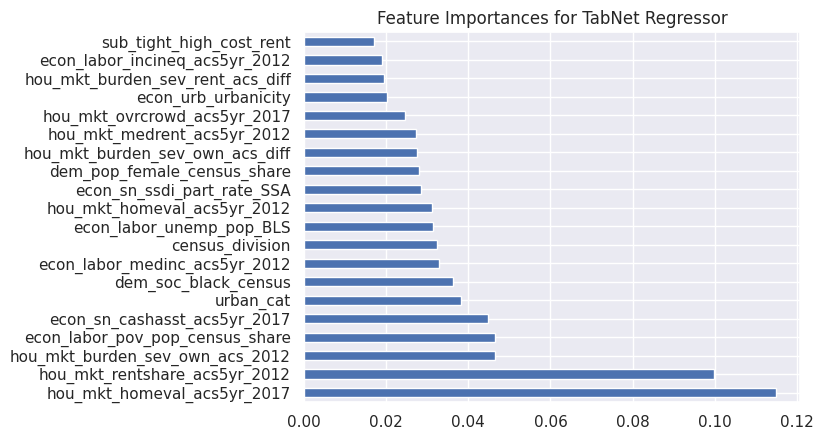

In [475]:

# regressor.feature_importances_
feat_importances = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', title="Feature Importances for TabNet Regressor");
tabnet_important_features = feat_importances.nlargest(20).index.values
tabnet_unimportant_features = feat_importances.nsmallest(20).index.values




In [476]:
for i, feat in enumerate(tabnet_important_features):
    print(f"{i}: {feat} is {what_is_this_feature(feat)}")

0: hou_mkt_homeval_acs5yr_2017 is 2016 median home value
1: hou_mkt_rentshare_acs5yr_2012 is 2011 share of renters
2: hou_mkt_burden_sev_own_acs_2012 is 2011 percentage of home owners with severe cost burden
3: econ_labor_pov_pop_census_share is poverty rate, number of persons in poverty to total population
4: econ_sn_cashasst_acs5yr_2017 is 2016 share of households with public assistance income
5: urban_cat is urbanicity category
6: dem_soc_black_census is total black alone (non-hispanic) population, intercensal estimate
7: econ_labor_medinc_acs5yr_2012 is 2011 median income
8: census_division is census region
9: econ_labor_unemp_pop_BLS is total unemployed population
10: hou_mkt_homeval_acs5yr_2012 is 2011 median home value
11: econ_sn_ssdi_part_rate_SSA is SSDI participation rate (ssdi participants/census population)
12: dem_pop_female_census_share is female population to total population
13: hou_mkt_burden_sev_own_acs_diff is change in hou_mkt_burden_sev_own_acs5yr values (2016 and

In [477]:
type_of_features(tabnet_important_features)

Housing        8
Economic       4
Subgroup       3
Demographic    2
Safety Net     2
Geography      1
Name: Associated Domain, dtype: int64

In [478]:
for i, feat in enumerate(tabnet_unimportant_features):
    print(f"{i}: {feat} is {what_is_this_feature(feat)}")

0: hou_pol_fedfundcoc is CoC federal funding - HUD
1: dem_pop_pop_census is total population, intercensal estimate
2: dem_pop_female_census is total female population, intercensal estimate
3: dem_pop_child_census is total population ages 0-19, intercensal estimate
4: dem_pop_adult_census is total population ages 20-64, intercensal estimate
5: dem_soc_white_census is total white alone (non-hispanic) population, intercensal estimate
6: dem_soc_native_census is total native alone (non-hispanic) population, intercensal estimate
7: dem_soc_asian_census is total asian alone (non-hispanic) population, intercensal estimate
8: dem_soc_pacific_census is total pacific islander alone (non-hispanic) population, intercensal estimate
9: fhfa_hpi_flag is flag indicating that counties in the CoC had missing variables for housing price
10: fhfa_hpi_2009 is 2009 base year house price index (HPI), from FHFA
11: econ_labor_force_pop_BLS is total population in the labor force
12: econ_labor_emp_pop_BLS is t

In [479]:
type_of_features(tabnet_unimportant_features)


Demographic    10
Housing         4
Safety Net      3
Economic        3
Name: Associated Domain, dtype: int64

Excitingly, TabNet reduced the amount of demographic-type features from 11 to 5 in the most important feature set. As explained before, some of these demographic features are obviously highly-correlated, and thus were wrongly deemed important through permutation important. This reduction allows greater confidence in these feature importances output by TabNet. 

~~An extension of my hypothesis was that rates of homelessness are related to areas that are high in tourism. This is similar to the reasoning for climate, in that places with high tourism are often locations with temperate climate. To support this hypothesis, TabNet placed `hou_mkt_renter_count_evlab` as the number 1 most important feature. This feature is defined as the count of renter-occupied households, which could include "any ~~

Three of the top features include the rental-housing market as highly predictive in rates of homelessness. "Not being able to afford to buy a home was the biggest reason renters gave when asked why they didn’t currently own a home in a recent survey" ([source](https://www.statista.com/statistics/187577/housing-units-occupied-by-renter-in-the-us-since-1975/)). 

Some other features that are significant to mention include `hou_pol_hlessconduct_total` as the count of prohibited conduct law violations and `econ_labor_unemp_pop_BLS` as the total unemployed population. I point to these two features as they seem the most intuitively understandable as to why they may predict rates of homelessness. https://humanrights.gov.au/our-work/rights-and-freedoms/publications/homelessness-human-rights-issue#fn64 cites Jones v City of Los Angeles in saying "Courts in the United States have held that these types of laws violate the constitutional right to freedom from cruel and unusual punishment because they punish homeless people on the basis of their status, not because of their conduct". The first one, `hou_pol_hlessconduct_total`, represents a law that could be defined as such, a vague definition of prohibited conduct allows Police to enact anti-homelessness policies, and makes sense as to why this feature would be predictive for high rates of homelessness.

Let's perform just a bit of EDA on the top features produced by TabNet to get a better understanding of why they are so predictive.

In [480]:
# prep for geopandas plotting of raw_df features
geo_df = geo_df.convert_dtypes()
geo_df.rename({"COCNUM": "cocnumber"}, axis=1, inplace=True)
merge_geo_df = geo_df.set_index("cocnumber")[["geometry", "SHAPE_Area", "SHAPE_Length"]]

raw_df_geo = gpd.GeoDataFrame(raw_df.join(merge_geo_df, on="cocnumber"))


In [481]:
def geo_plot_from_raw_df_2017(feature):
    fig = plt.figure(figsize=(20, 20))
    plt.rc('font', size=20)

    ax = fig.add_subplot(111)
    temp_df = raw_df_geo[raw_df_geo["year"] == 2017]
    temp_df[feature] = temp_df[feature].astype('float')
    temp_df.plot(feature, ax=ax, legend=True);
    ax.set_xlim(-180, -60);
    ax.set_title(f"{feature} from 2017");
    
def geo_plot_from_raw_df(feature):
    fig = plt.figure(figsize=(20, 20))
    plt.rc('font', size=20)

    ax = fig.add_subplot(111)
    temp_df = geo_df.join(raw_df_geo.groupby(["cocnumber"])[feature].mean(), on="cocnumber")
    temp_df[feature] = temp_df[feature].astype('float')
    temp_df.plot(feature, ax=ax, legend=True);
    ax.set_xlim(-180, -60);
    ax.set_title(f"Average from 2011-2017 {feature}");


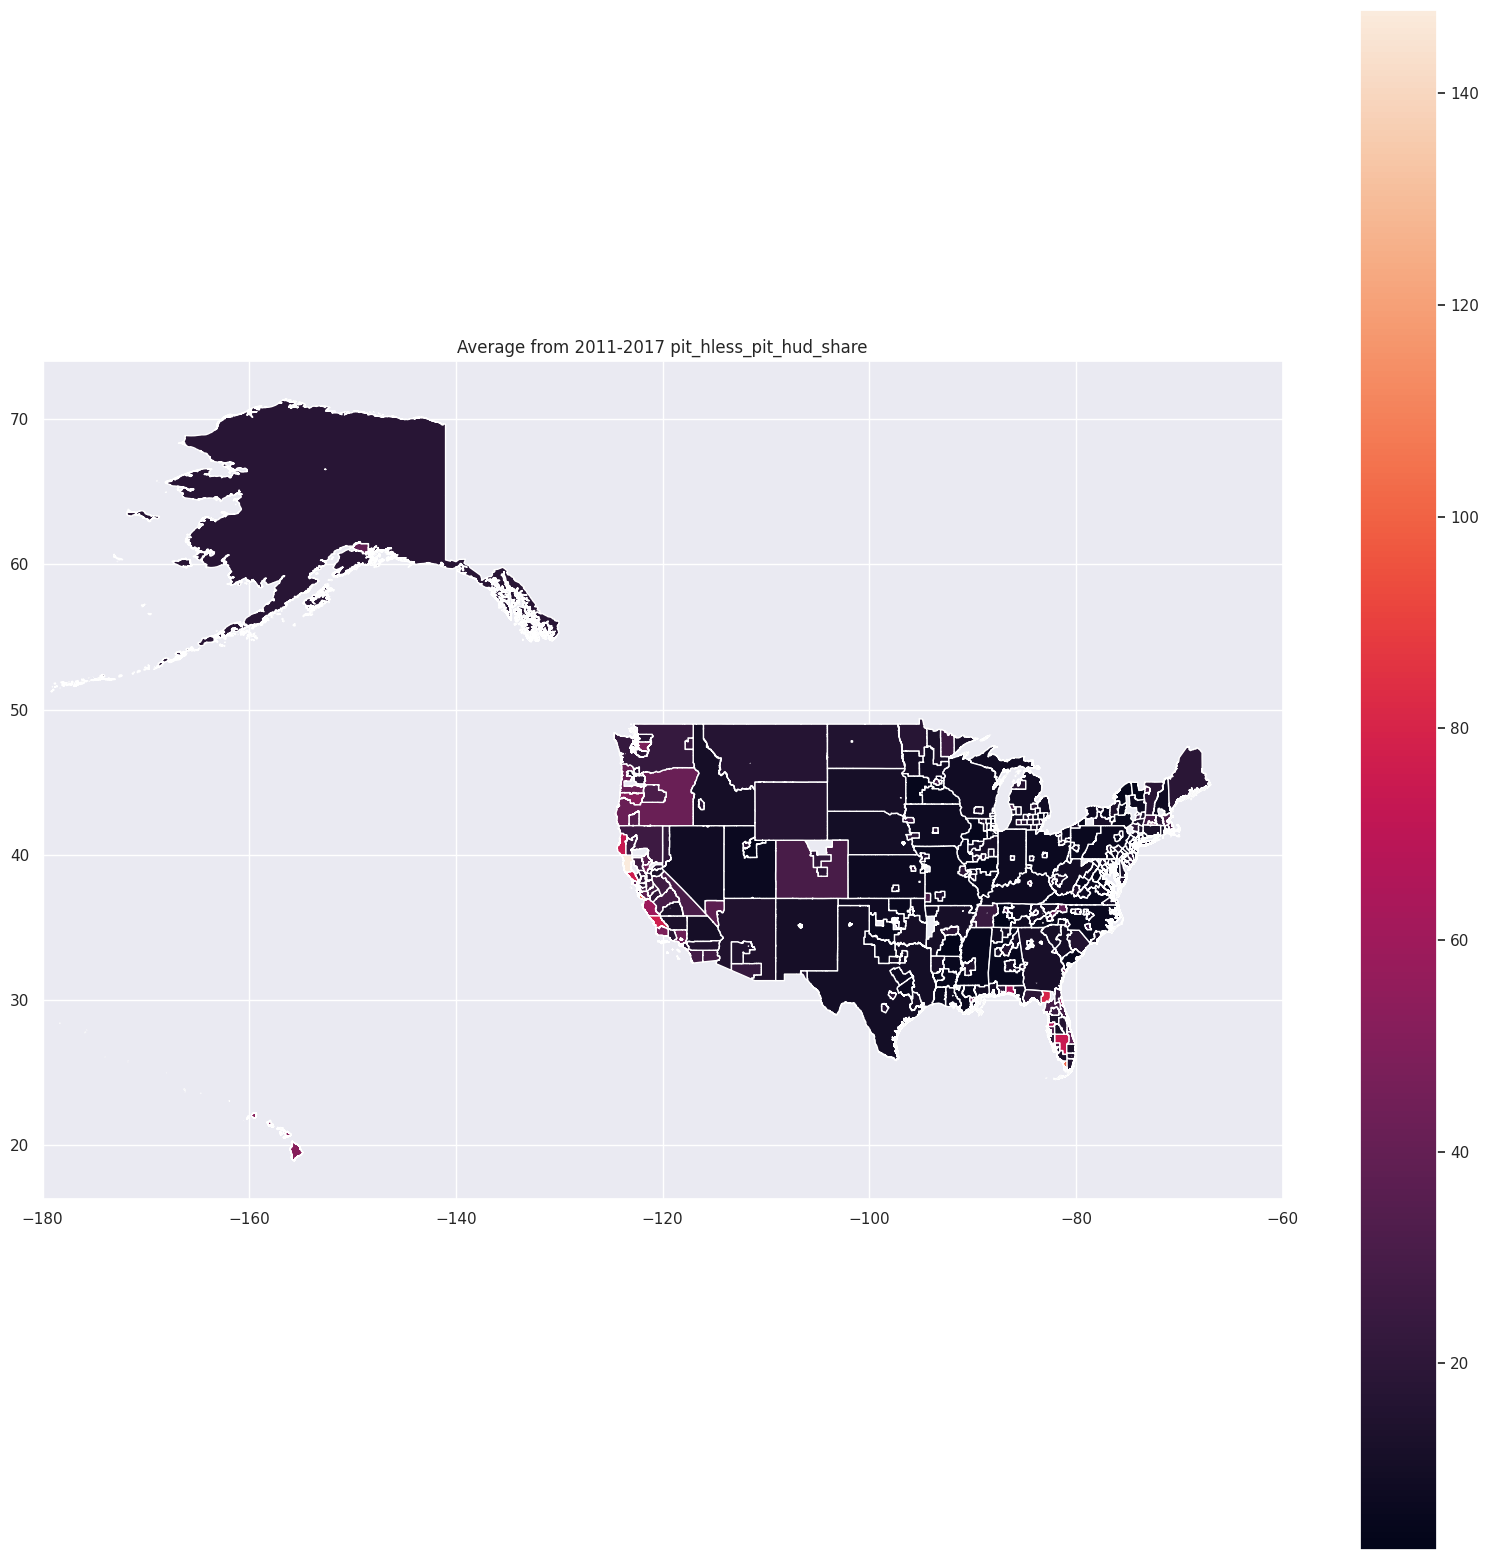

In [482]:
geo_plot_from_raw_df(target)

/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


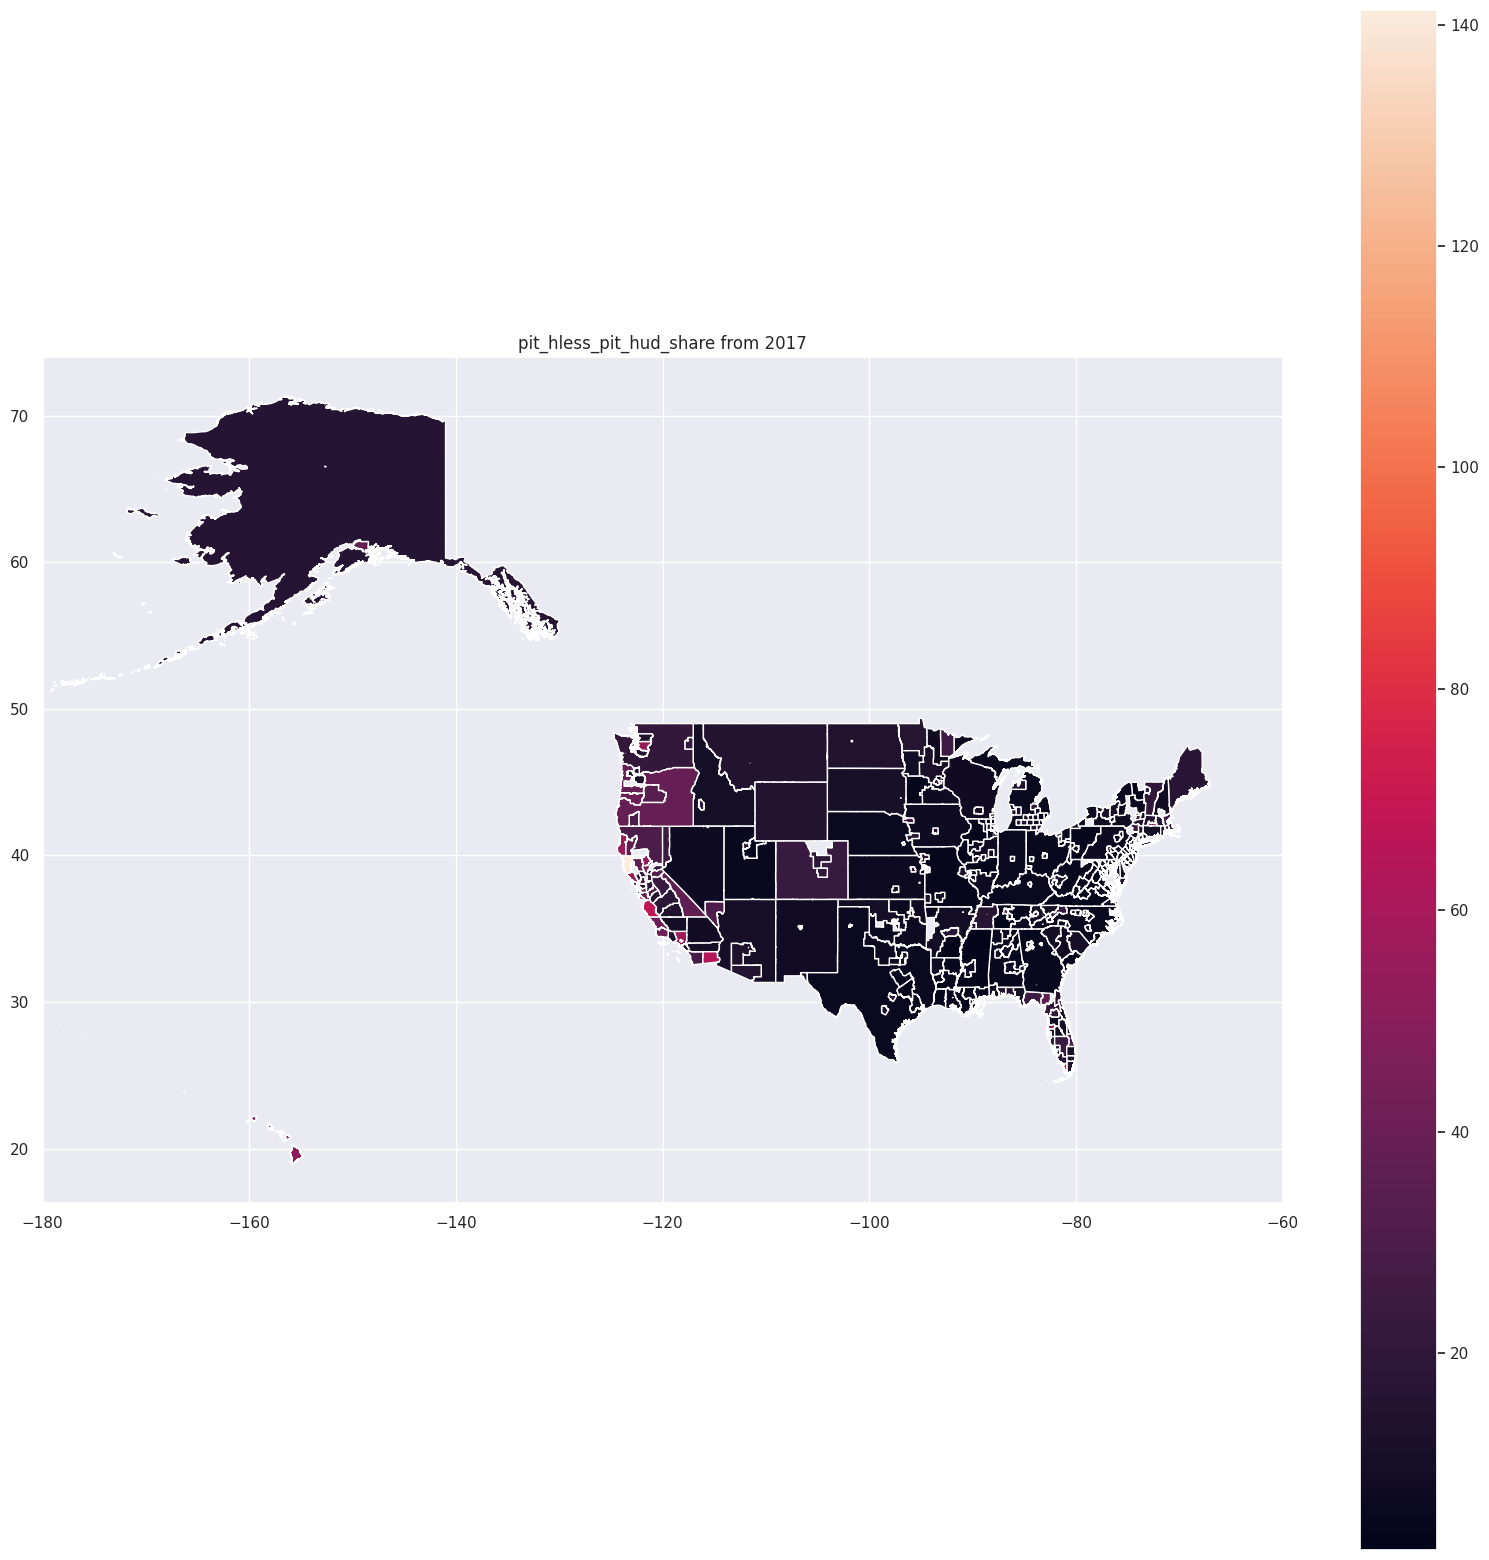

In [483]:
geo_plot_from_raw_df_2017(target)


/home/tybens/Desktop/Junior/SML312/proj/sml312/lib/python3.10/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


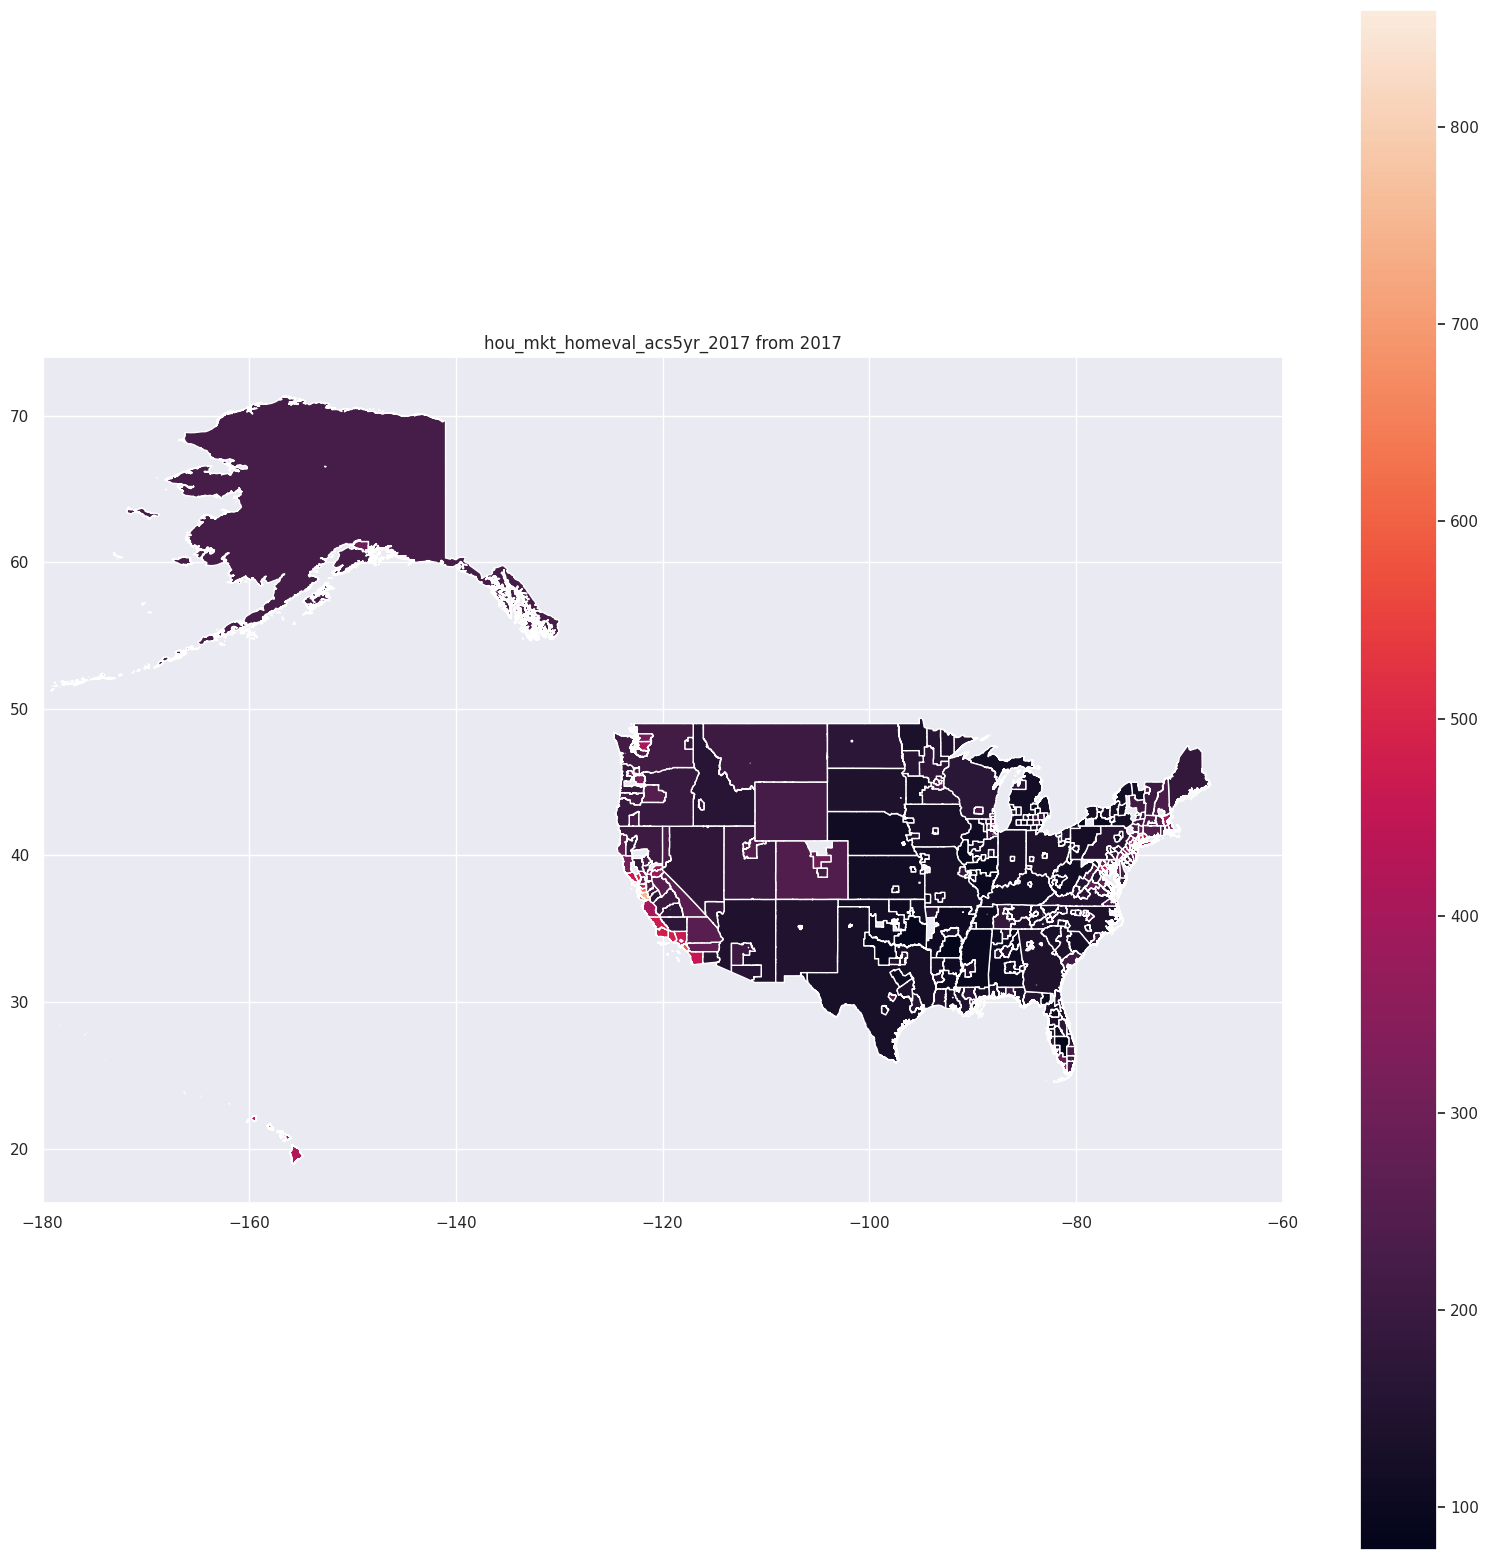

In [484]:
geo_plot_from_raw_df_2017(tabnet_important_features[0])


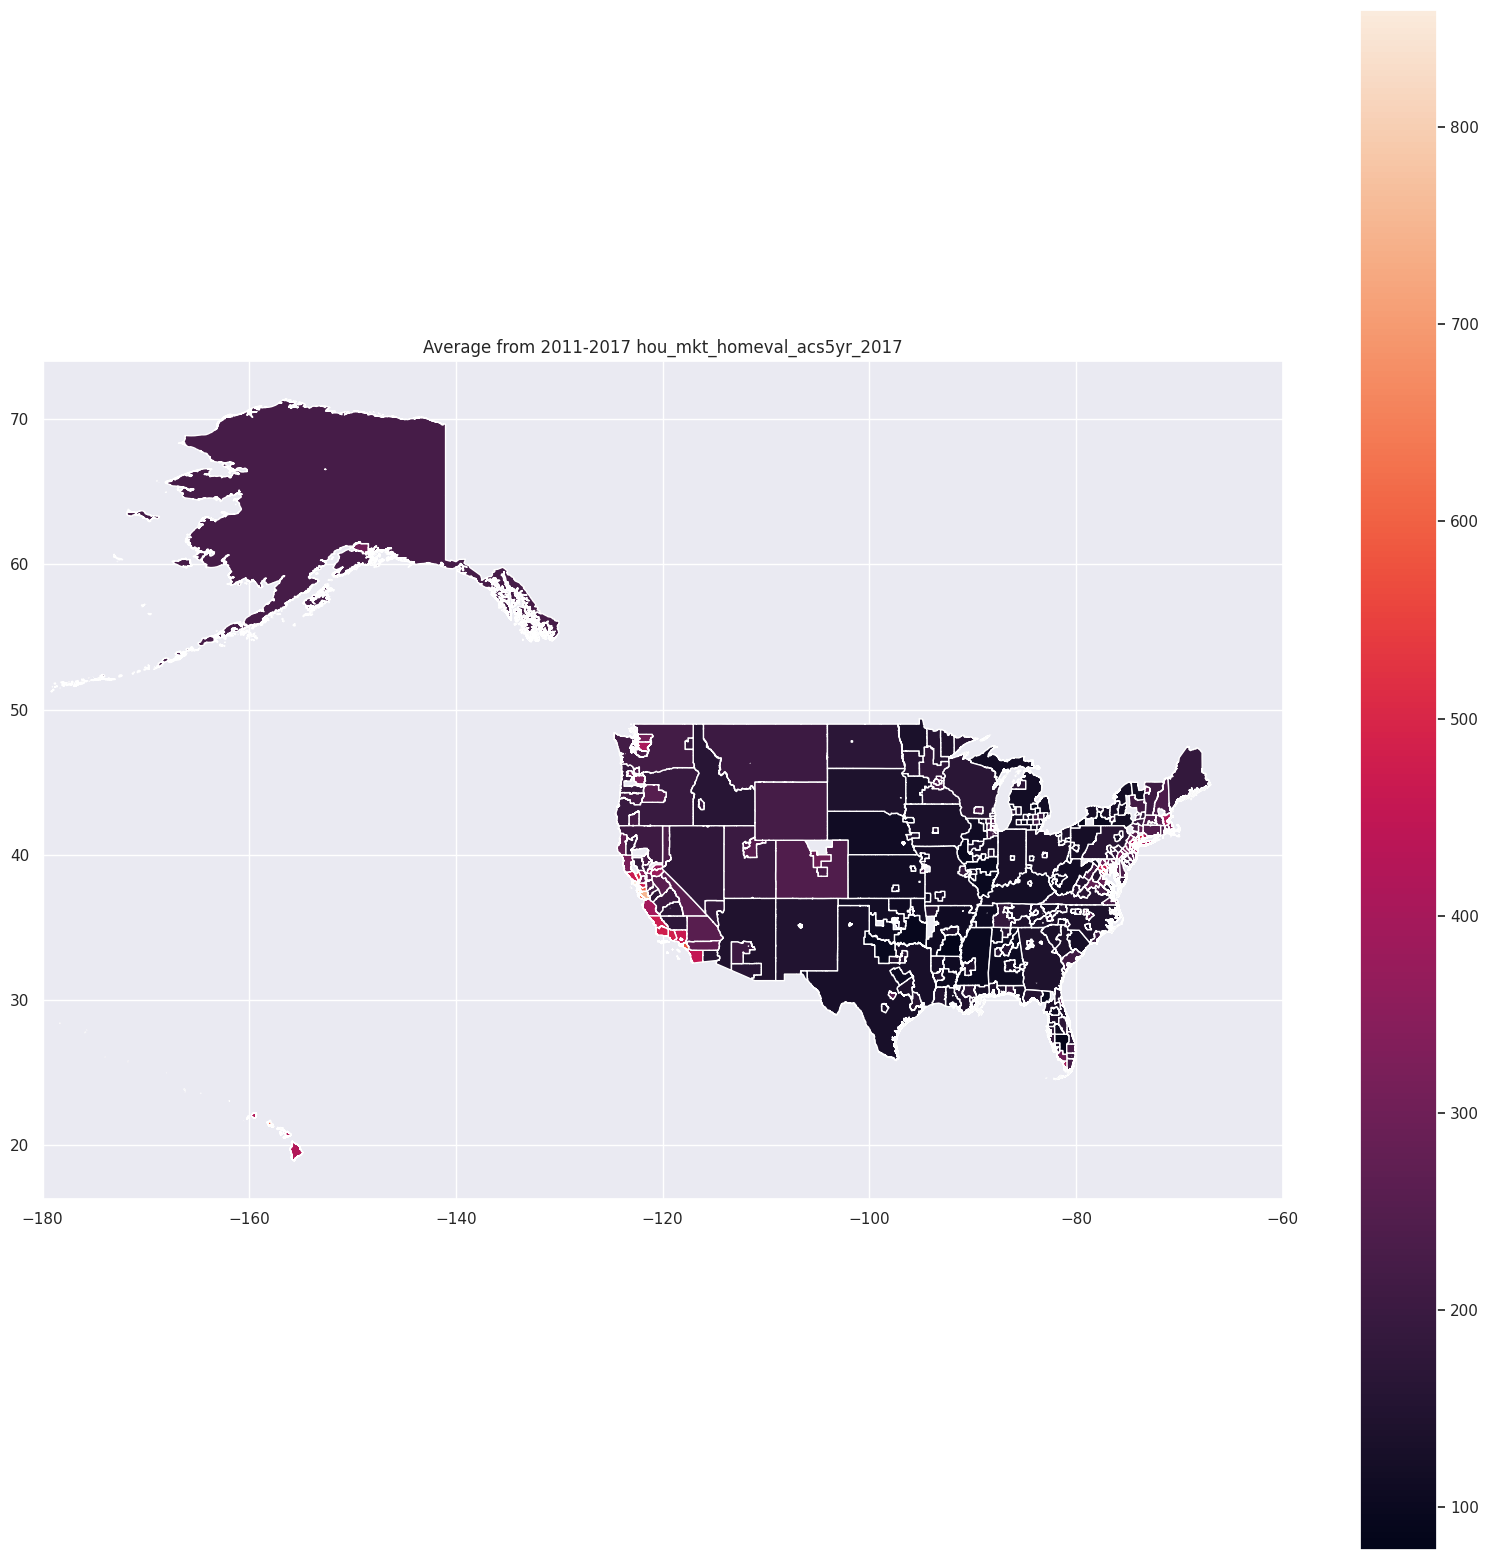

In [485]:
geo_plot_from_raw_df(tabnet_important_features[0])

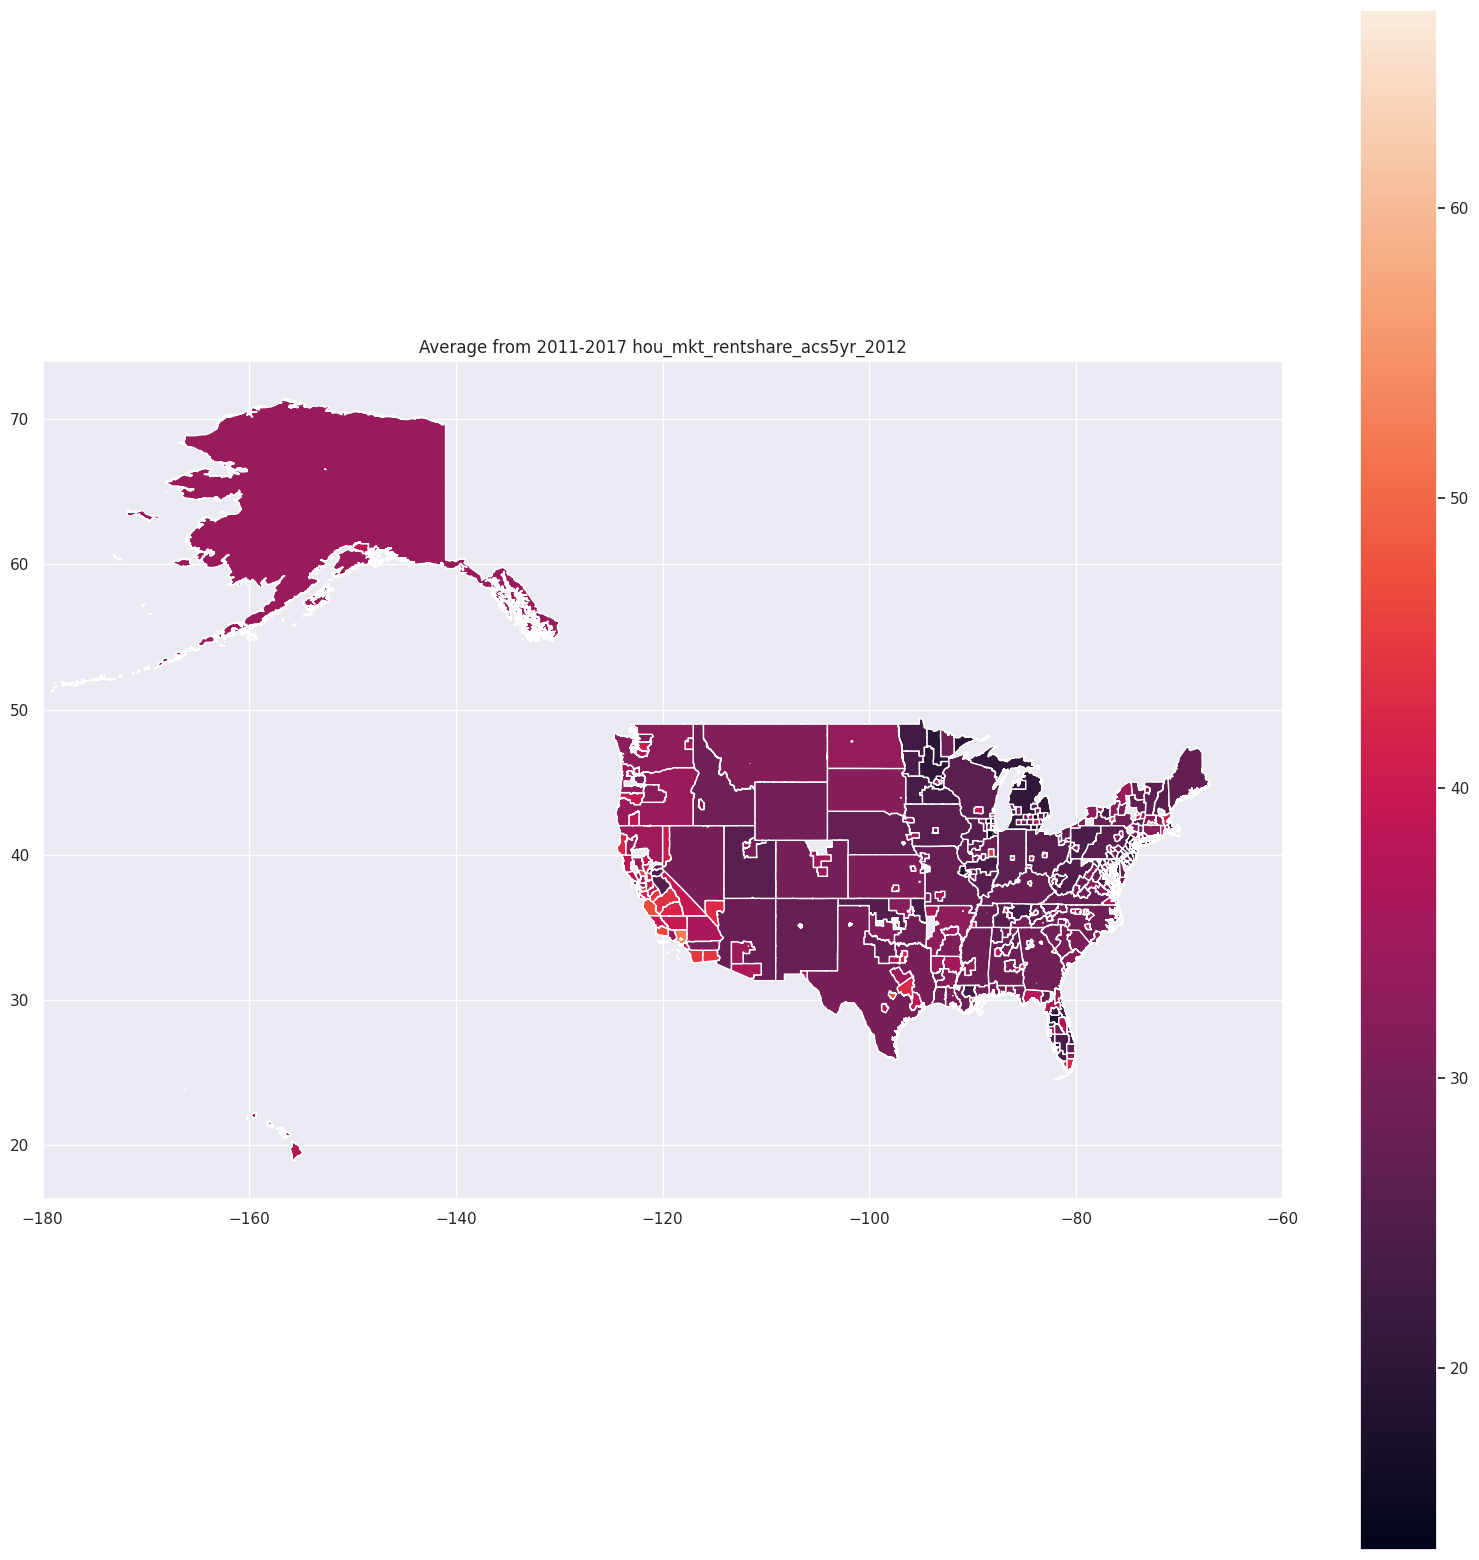

In [486]:
geo_plot_from_raw_df(tabnet_important_features[1])

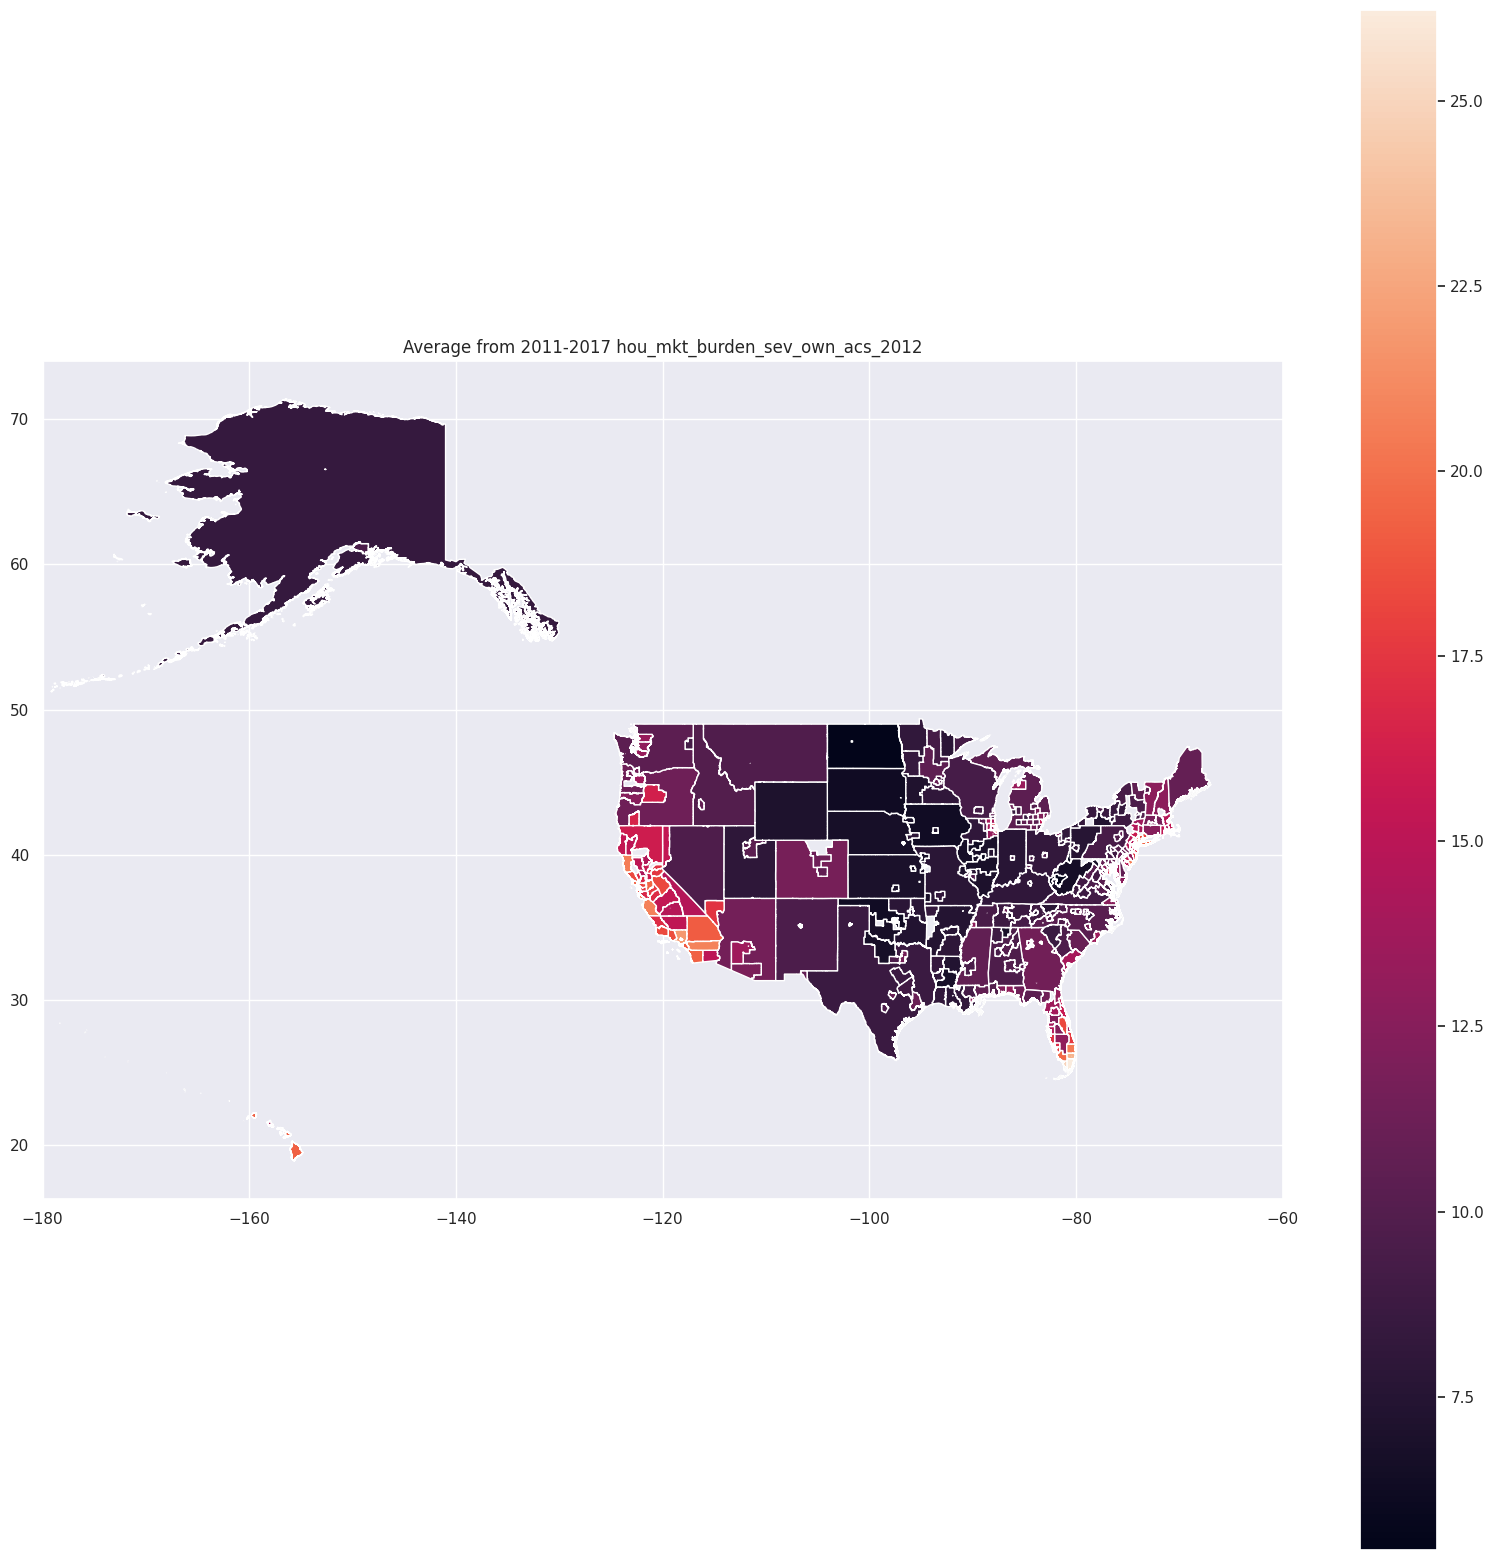

In [487]:
geo_plot_from_raw_df(tabnet_important_features[2])

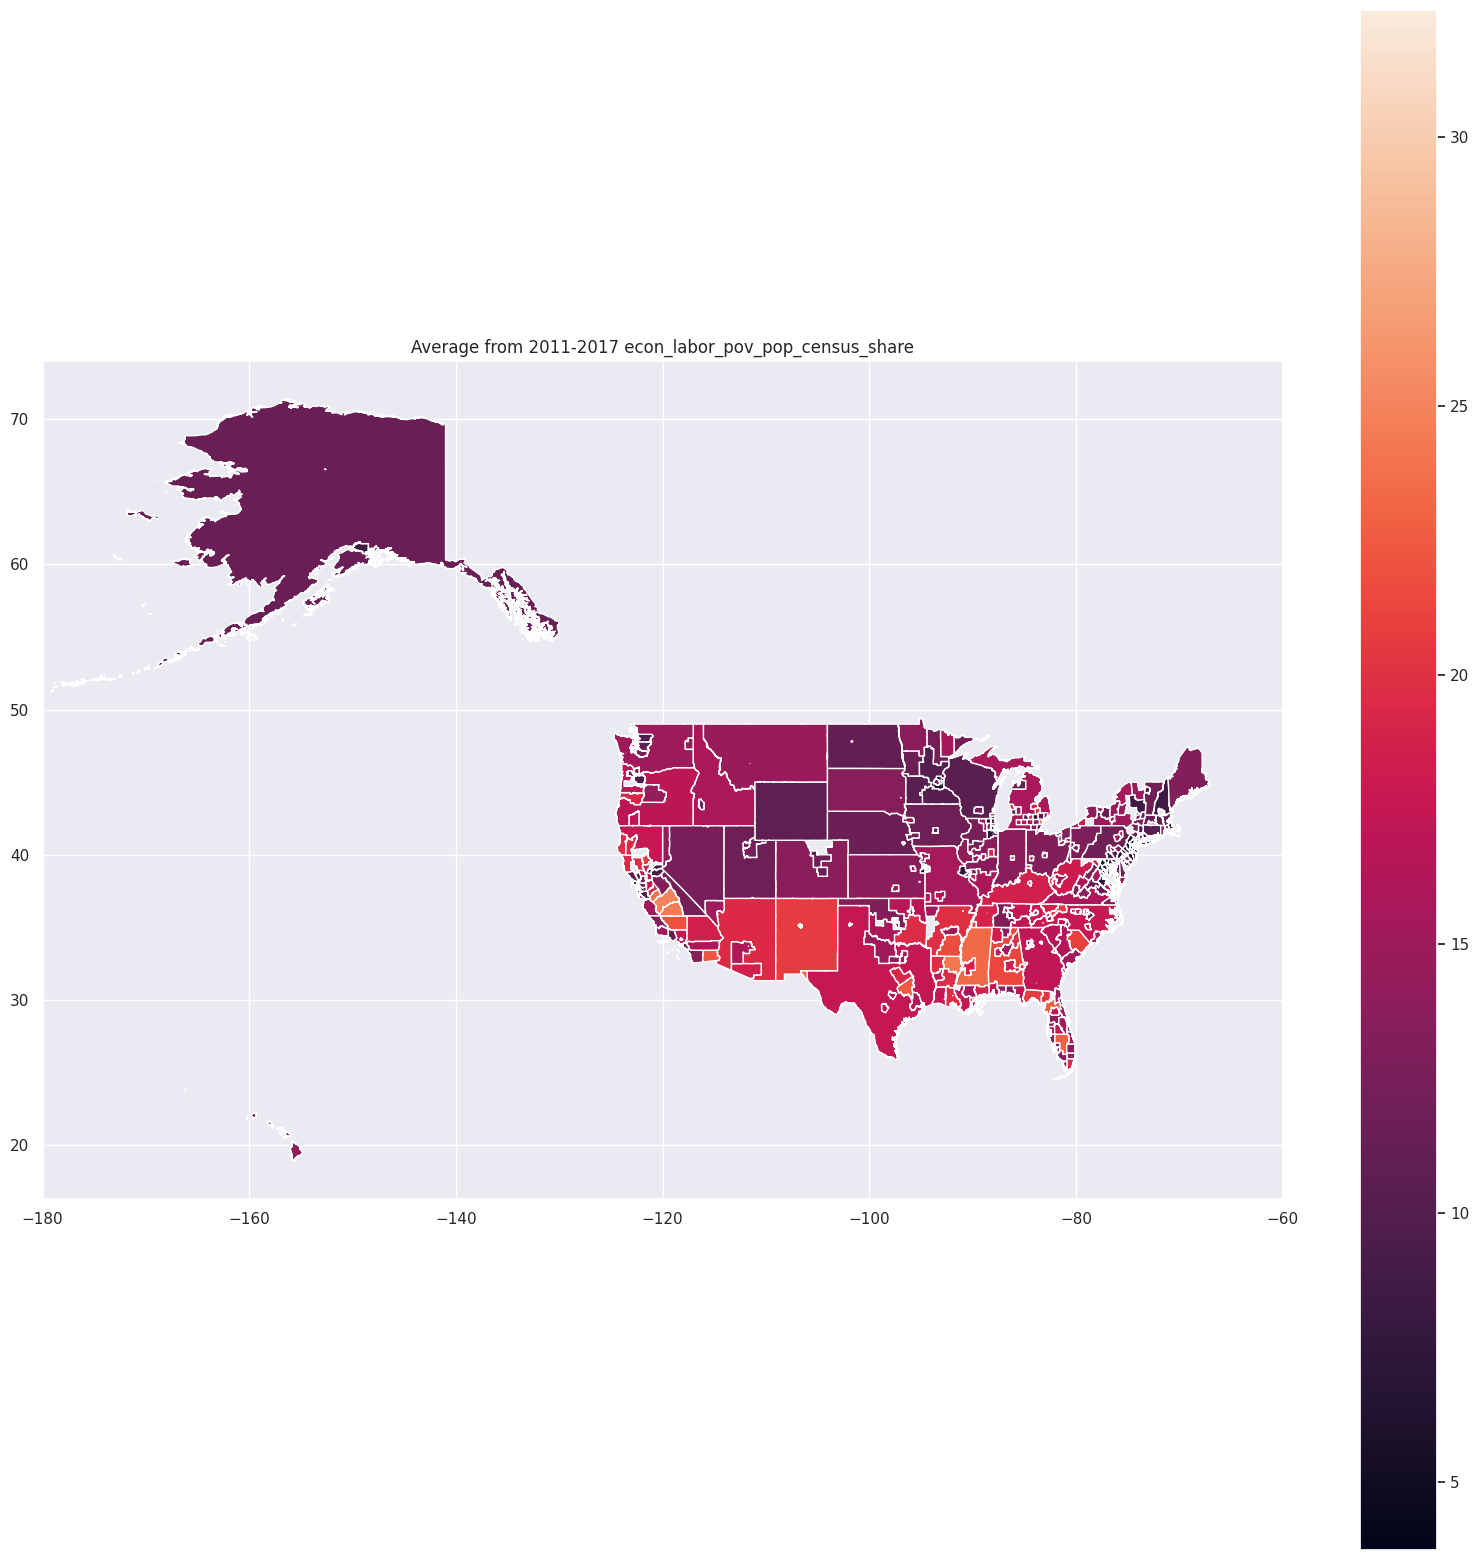

In [488]:
geo_plot_from_raw_df(tabnet_important_features[3])

Scatter plots:

<AxesSubplot: xlabel='hou_mkt_homeval_acs5yr_2017', ylabel='pit_hless_pit_hud_share'>

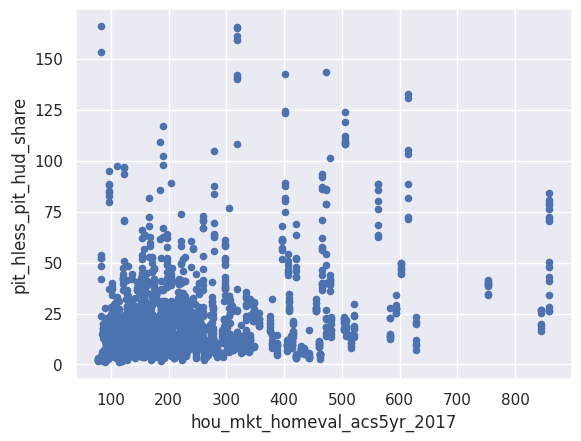

In [489]:
raw_df.plot(x=tabnet_important_features[0], y=target, kind='scatter')

Are we predicting so well because we have multiple years of data?

In [ ]:
# Make sure X is defined
Xo = raw_df[raw_df.year == 2017].drop(outcome_features + identifier_features +
                categorical_features, axis=1)
yo = raw_df[raw_df.year == 2017][target]


Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.2, random_state=30)


In [ ]:
cross_validate(LinearRegression(), Xo_train, yo_train, scoring='r2', return_train_score=True)

##### How does some of the data change over time?

In [ ]:
y = 'hou_mkt_renter_count_evlab'

plt_df = raw_df.set_index('year')[[i in high_outlier_CoCs for i in raw_df.cocnumber]]

plt_df.groupby(['cocnumber'])[y].plot(legend=True);
plt.title("Count of renter-occupied houses as a function of year for top outlier communities")
plt.ylabel("Count of renter-ocupied houses")
plt.xlabel("Year")